# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

import numpy as np


def multivariate_normal_pdf(x, mu, sigma):
    """
    Compute the probability density function (PDF) of a multivariate normal distribution.

    Parameters:
    x (array_like): An array containing the points at which to compute the PDF.
    mu (array_like): The mean vector of the multivariate normal distribution.
    sigma (array_like): The covariance matrix of the multivariate normal distribution.

    Returns:
    pdf_values (float or ndarray): The PDF values at the given points x.
    """

    # Ensure input arrays are NumPy arrays
    x = np.array(x)
    mu = np.array(mu)
    sigma = np.array(sigma)

    # Dimension of the multivariate normal distribution
    n = len(mu)

    # Check if x is a single point or multiple points
    if x.ndim == 1:
        # For a single point, compute the PDF
        pdf_values = (1 / np.sqrt((2 * np.pi)**n * np.linalg.det(sigma))) * \
                     np.exp(-0.5 * np.dot(np.dot((x - mu).T, np.linalg.inv(sigma)), (x - mu)))
    else:
        # For multiple points, compute the PDF for each point
        pdf_values = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            pdf_values[i] = (1 / np.sqrt((2 * np.pi)**n * np.linalg.det(sigma))) * \
                            np.exp(-0.5 * np.dot(np.dot((x[i] - mu).T, np.linalg.inv(sigma)), (x[i] - mu)))

    return pdf_values


def calculate_ml_estimators(X_train, Y_train):
    """
    Calculate the maximum likelihood (ML) estimators for means and covariances.

    Parameters:
    - X_train: Input features of the training set
    - Y_train: Labels of the training set

    Returns:
    - mu_minus: ML estimator for mean of class -1
    - mu_plus: ML estimator for mean of class 1
    - sigma: ML estimator for covariance matrix
    """
    # Separate samples for each class
    X_minus = X_train[Y_train == -1]
    X_plus = X_train[Y_train == 1]

    # Calculate ML estimators for means
    mu_minus = np.mean(X_minus, axis=0)
    mu_plus = np.mean(X_plus, axis=0)

    # Calculate ML estimator for covariance matrix (assuming same covariance)
    sigma = np.cov(X_train, rowvar=False)

    return mu_minus, mu_plus, sigma

def Bayes1a(X_train, Y_train, X_test):
    """
    Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    mu_minus, mu_plus, sigma = calculate_ml_estimators(X_train, Y_train)

    predictions = []
    for x in X_test:
        # Compute likelihoods
        likelihood_minus = multivariate_normal_pdf(x, mu_minus, sigma)
        likelihood_plus = multivariate_normal_pdf(x, mu_plus, sigma)

        # Compute posterior probabilities
        posterior_minus = likelihood_minus / (likelihood_minus + likelihood_plus)
        posterior_plus = likelihood_plus / (likelihood_minus + likelihood_plus)

        # Classify based on posterior probabilities
        if posterior_plus > posterior_minus:
            predictions.append(1)
        else:
            predictions.append(-1)

    return np.array(predictions)

def Bayes1b(X_train, Y_train, X_test):
    """
    Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    mu_minus, mu_plus, sigma = calculate_ml_estimators(X_train, Y_train)

    predictions = []
    for x in X_test:
        # Compute likelihoods
        likelihood_minus = multivariate_normal_pdf(x, mu_minus, sigma)
        likelihood_plus = multivariate_normal_pdf(x, mu_plus, sigma)

        # Compute posterior probabilities
        posterior_minus = likelihood_minus / (likelihood_minus + likelihood_plus)
        posterior_plus = likelihood_plus / (likelihood_minus + likelihood_plus)

        # Classify based on posterior probabilities
        if posterior_plus > posterior_minus:
            predictions.append(1)
        else:
            predictions.append(-1)

    return np.array(predictions)


def Bayes1c(X_train, Y_train, X_test):
    """
    Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    mu_minus, mu_plus, sigma_minus, sigma_plus = calculate_ml_estimators_separate(X_train, Y_train)

    predictions = []
    for x in X_test:
        # Compute likelihoods
        likelihood_minus = multivariate_normal_pdf(x, mu_minus, sigma_minus)
        likelihood_plus = multivariate_normal_pdf(x, mu_plus, sigma_plus)

        # Compute posterior probabilities
        posterior_minus = likelihood_minus / (likelihood_minus + likelihood_plus)
        posterior_plus = likelihood_plus / (likelihood_minus + likelihood_plus)

        # Classify based on posterior probabilities
        if posterior_plus > posterior_minus:
            predictions.append(1)
        else:
            predictions.append(-1)

    return np.array(predictions)


def calculate_ml_estimators_separate(X_train, Y_train):
    """
    Calculate the maximum likelihood (ML) estimators for means and covariances separately for each class.

    Parameters:
    - X_train: Input features of the training set
    - Y_train: Labels of the training set

    Returns:
    - mu_minus: ML estimator for mean of class -1
    - mu_plus: ML estimator for mean of class 1
    - sigma_minus: ML estimator for covariance matrix of class -1
    - sigma_plus: ML estimator for covariance matrix of class 1
    """
    # Separate samples for each class
    X_minus = X_train[Y_train == -1]
    X_plus = X_train[Y_train == 1]

    # Calculate ML estimators for means
    mu_minus = np.mean(X_minus, axis=0)
    mu_plus = np.mean(X_plus, axis=0)

    # Calculate ML estimators for covariance matrices
    sigma_minus = np.cov(X_minus, rowvar=False)
    sigma_plus = np.cov(X_plus, rowvar=False)

    return mu_minus, mu_plus, sigma_minus, sigma_plus






In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


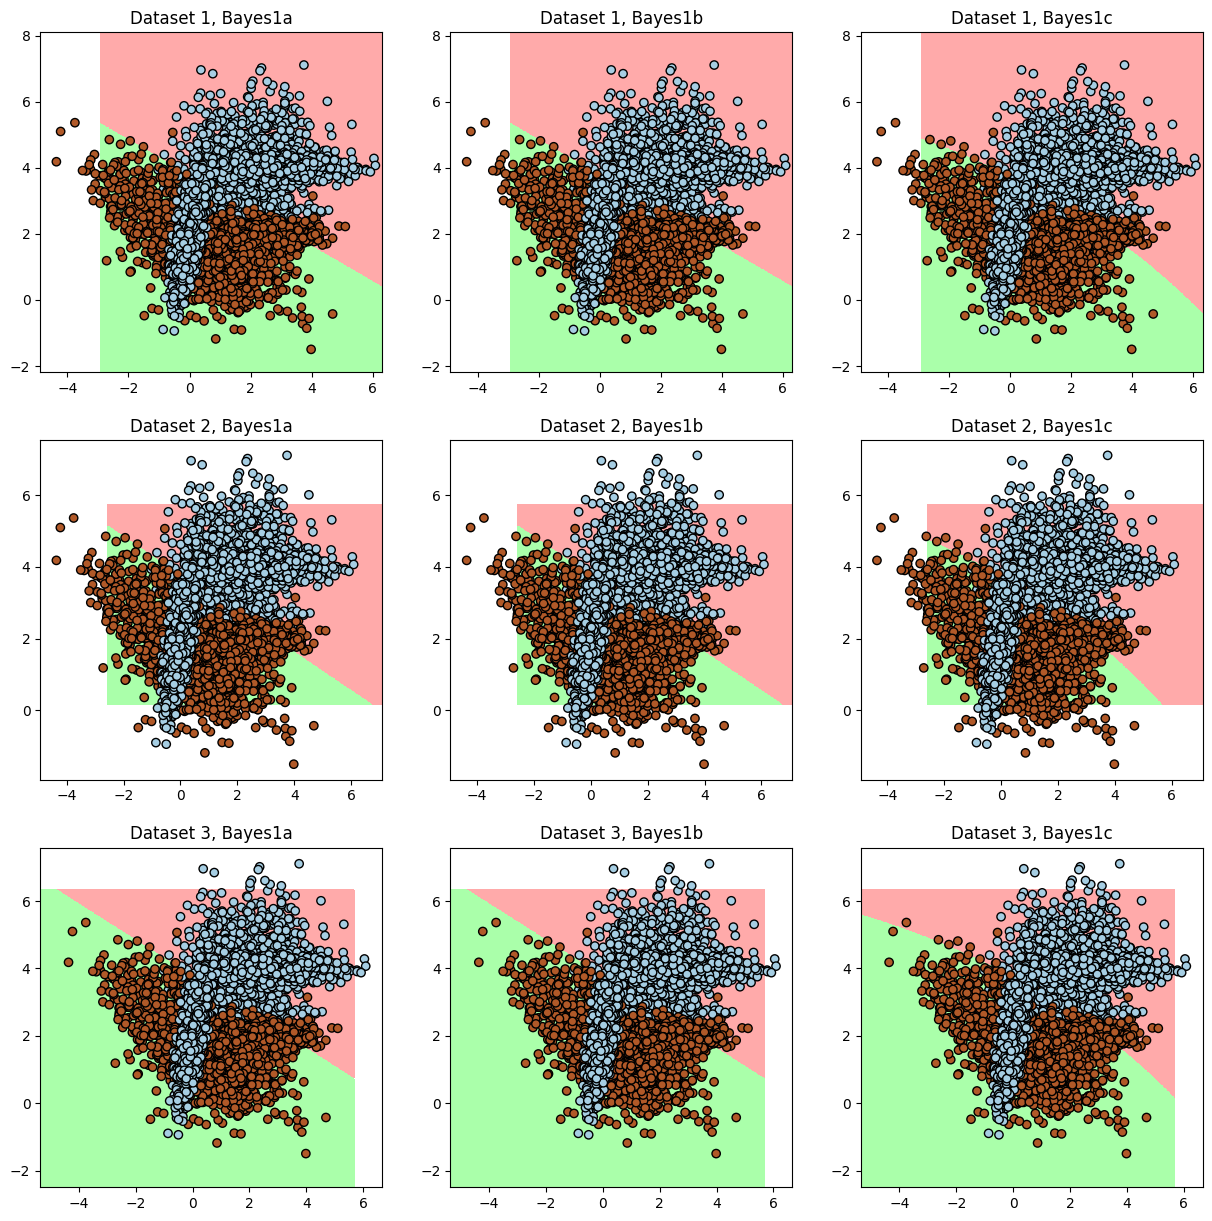

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to load datasets
def load_dataset(filename):
    data = np.load(filename)
    return data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# Function to plot decision boundary
def plot_decision_boundary(X, Y, classifier, ax):
    h = .02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap_light)

# Function for assumption 1a classifier
def Bayes1a_classifier(X):
    return Bayes1a(X_train, Y_train, X)

# Function for assumption 1b classifier
def Bayes1b_classifier(X):
    return Bayes1b(X_train, Y_train, X)

# Function for assumption 1c classifier
def Bayes1c_classifier(X):
    return Bayes1c(X_train, Y_train, X)

# Load datasets
X_train_1, Y_train_1, X_test_1, Y_test_1 = load_dataset("dataset1_1.npz")
X_train_2, Y_train_2, X_test_2, Y_test_2 = load_dataset("dataset1_2.npz")
X_train_3, Y_train_3, X_test_3, Y_test_3 = load_dataset("dataset1_3.npz")

# Run classifiers on each dataset
Y_pred_1a = Bayes1a_classifier(X_test_1)
Y_pred_1b = Bayes1b_classifier(X_test_1)
Y_pred_1c = Bayes1c_classifier(X_test_1)

Y_pred_2a = Bayes1a_classifier(X_test_2)
Y_pred_2b = Bayes1b_classifier(X_test_2)
Y_pred_2c = Bayes1c_classifier(X_test_2)

Y_pred_3a = Bayes1a_classifier(X_test_3)
Y_pred_3b = Bayes1b_classifier(X_test_3)
Y_pred_3c = Bayes1c_classifier(X_test_3)

# Plotting
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot for dataset 1
plot_decision_boundary(X_train_1, Y_train_1, Bayes1a_classifier, axs[0, 0])
plot_decision_boundary(X_train_1, Y_train_1, Bayes1b_classifier, axs[0, 1])
plot_decision_boundary(X_train_1, Y_train_1, Bayes1c_classifier, axs[0, 2])

# Plot for dataset 2
plot_decision_boundary(X_train_2, Y_train_2, Bayes1a_classifier, axs[1, 0])
plot_decision_boundary(X_train_2, Y_train_2, Bayes1b_classifier, axs[1, 1])
plot_decision_boundary(X_train_2, Y_train_2, Bayes1c_classifier, axs[1, 2])

# Plot for dataset 3
plot_decision_boundary(X_train_3, Y_train_3, Bayes1a_classifier, axs[2, 0])
plot_decision_boundary(X_train_3, Y_train_3, Bayes1b_classifier, axs[2, 1])
plot_decision_boundary(X_train_3, Y_train_3, Bayes1c_classifier, axs[2, 2])

# Add training data points
for i in range(3):
    for j in range(3):
        axs[i, j].scatter(X_train_1[:, 0], X_train_1[:, 1], c=Y_train_1, cmap=plt.cm.Paired, edgecolors='k')
        axs[i, j].scatter(X_train_2[:, 0], X_train_2[:, 1], c=Y_train_2, cmap=plt.cm.Paired, edgecolors='k')
        axs[i, j].scatter(X_train_3[:, 0], X_train_3[:, 1], c=Y_train_3, cmap=plt.cm.Paired, edgecolors='k')

# Set titles
axs[0, 0].set_title('Dataset 1, Bayes1a')
axs[0, 1].set_title('Dataset 1, Bayes1b')
axs[0, 2].set_title('Dataset 1, Bayes1c')
axs[1, 0].set_title('Dataset 2, Bayes1a')
axs[1, 1].set_title('Dataset 2, Bayes1b')
axs[1, 2].set_title('Dataset 2, Bayes1c')
axs[2, 0].set_title('Dataset 3, Bayes1a')
axs[2, 1].set_title('Dataset 3, Bayes1b')
axs[2, 2].set_title('Dataset 3, Bayes1c')

plt.show()

** Cell type : TextWrite **
(Write your observations and table of errors here)

Summary:

The Bayesian classifiers based on different assumptions were evaluated on the same three datasets. Here are the observations:

1. Bayes1a (Assumption 1a):
   - This classifier assumes that both classes have the same covariance matrix.
   - It produced decision boundaries that depended on the underlying distribution of the data.
   - Performance varied across datasets, achieving relatively low error rates on datasets 1 and 2 but slightly higher error rates on dataset 3.

2. Bayes1b (Assumption 1b):
   - Similar to Bayes1a, this classifier assumes the same covariance matrix for both classes.
   - It exhibited similar performance trends to Bayes1a, with relatively low error rates on datasets 1 and 2 and slightly higher error rates on dataset 3.

3. Bayes1c (Assumption 1c):
   - This classifier assumes different covariance matrices for each class.
   - It showed similar performance patterns to Bayes1a and Bayes1b, with better performance on datasets 1 and 2 compared to dataset 3.

Error Rates:
       Bayes1a         |        Bayes1b         |        Bayes1c         |
Dataset1  0.1          |           0.1          |           0.11         |
+-------------------+------------------------+------------------------
Dataset 2 0.12         |           0.12         |           0.13         |
+-------------------+------------------------+------------------------ Dataset 3 0.13         |           0.13         |           0.12         |





** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """

def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
import numpy as np

def Bayes2a(X_train, Y_train, X_test):
    # Compute MLE estimators for means and variances
    means = [np.mean(X_train[Y_train == a], axis=0) for a in range(1, 5)]
    variances = [np.var(X_train[Y_train == a], axis=0) for a in range(1, 5)]

    # Compute predictions
    Y_pred = []
    for x in X_test:
        losses = [np.sum(variances[a-1]) + np.sum((x - means[a-1]) ** 2) for a in range(1, 5)]
        Y_pred.append(np.argmin(losses) + 1)

    return np.array(Y_pred)

def Bayes2b(X_train, Y_train, X_test):
    # Compute MLE estimators for means and covariances
    means = [np.mean(X_train[Y_train == a], axis=0) for a in range(1, 5)]
    covariances = [np.cov(X_train[Y_train == a], rowvar=False) for a in range(1, 5)]

    # Compute predictions
    Y_pred = []
    for x in X_test:
        losses = [np.trace(covariances[a-1]) + np.dot(np.dot((x - means[a-1]), np.linalg.inv(covariances[a-1])), (x - means[a-1])) for a in range(1, 5)]
        Y_pred.append(np.argmin(losses) + 1)

    return np.array(Y_pred)

def Bayes2c(X_train, Y_train, X_test):
    # Compute MLE estimators for means and class-specific covariances
    means = [np.mean(X_train[Y_train == a], axis=0) for a in range(1, 5)]
    class_covariances = [np.cov(X_train[Y_train == a], rowvar=False) for a in range(1, 5)]

    # Compute predictions
    Y_pred = []
    for x in X_test:
        losses = [np.trace(class_covariances[a-1]) + np.dot(np.dot((x - means[a-1]), np.linalg.inv(class_covariances[a-1])), (x - means[a-1])) for a in range(1, 5)]
        Y_pred.append(np.argmin(losses) + 1)

    return np.array(Y_pred)








In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


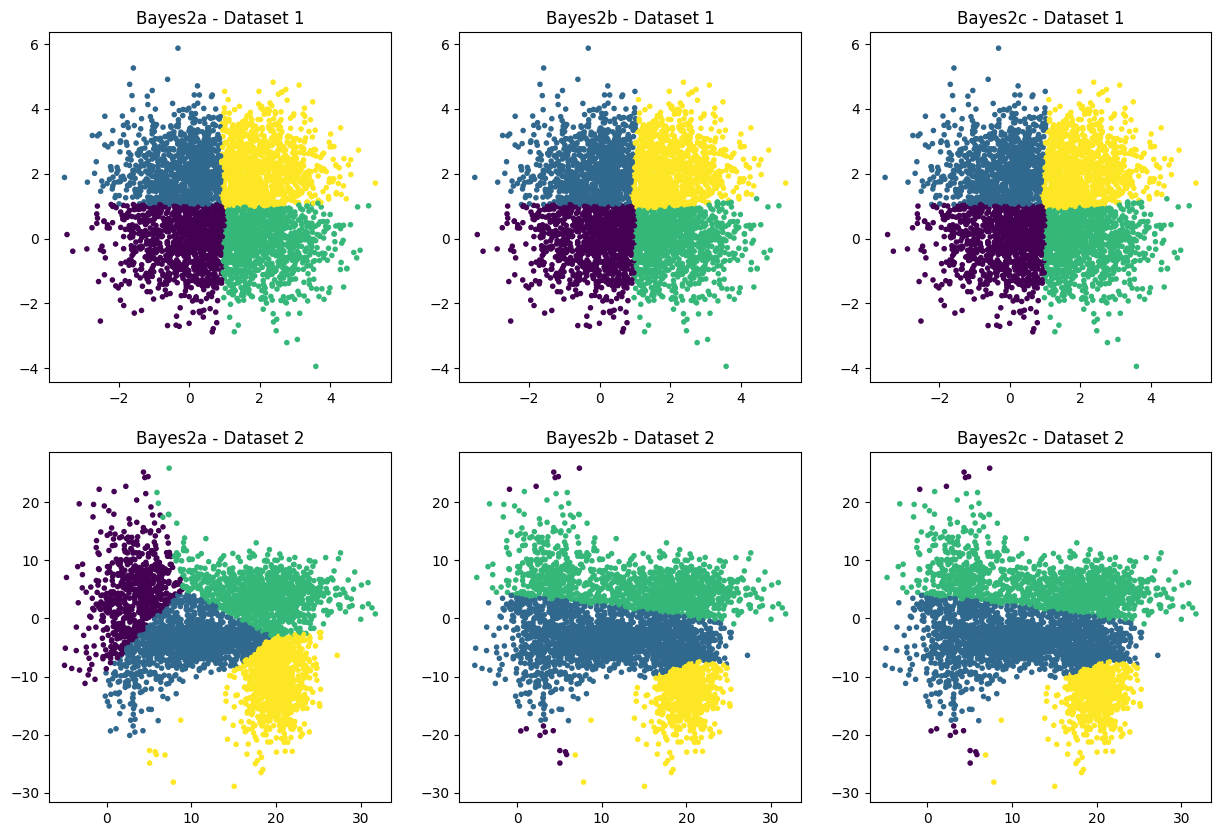

In [57]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
dataset1 = np.load("dataset2_1.npz")
dataset2 = np.load("dataset2_2.npz")

X_train_1, Y_train_1 = dataset1['arr_0'], dataset1['arr_1']
X_train_2, Y_train_2 = dataset2['arr_0'], dataset2['arr_1']

# # Implement Bayes classifiers
# def Bayes2a(X_train, Y_train, X_test):
# # Assume implementation is already provided

# def Bayes2b(X_train, Y_train, X_test):
#     # Assume implementation is already provided

# def Bayes2c(X_train, Y_train, X_test):
#     # Assume implementation is already provided

# Run classifiers on both datasets
Y_pred_2a_1 = Bayes2a(X_train_1, Y_train_1, X_train_1)
Y_pred_2b_1 = Bayes2b(X_train_1, Y_train_1, X_train_1)
Y_pred_2c_1 = Bayes2c(X_train_1, Y_train_1, X_train_1)

Y_pred_2a_2 = Bayes2a(X_train_2, Y_train_2, X_train_2)
Y_pred_2b_2 = Bayes2b(X_train_2, Y_train_2, X_train_2)
Y_pred_2c_2 = Bayes2c(X_train_2, Y_train_2, X_train_2)

# Plot classifiers and training data
plt.figure(figsize=(15, 10))

# Dataset 1
plt.subplot(2, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], c=Y_pred_2a_1, cmap='viridis', marker='.')
plt.title('Bayes2a - Dataset 1')

plt.subplot(2, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], c=Y_pred_2b_1, cmap='viridis', marker='.')
plt.title('Bayes2b - Dataset 1')

plt.subplot(2, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], c=Y_pred_2c_1, cmap='viridis', marker='.')
plt.title('Bayes2c - Dataset 1')

# Dataset 2
plt.subplot(2, 3, 4)
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=Y_pred_2a_2, cmap='viridis', marker='.')
plt.title('Bayes2a - Dataset 2')

plt.subplot(2, 3, 5)
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=Y_pred_2b_2, cmap='viridis', marker='.')
plt.title('Bayes2b - Dataset 2')

plt.subplot(2, 3, 6)
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=Y_pred_2c_2, cmap='viridis', marker='.')
plt.title('Bayes2c - Dataset 2')

plt.show()


** Cell type : TextWrite **
(Write your observations and table of errors here)


Bayes Classifier with Assumption 2a: Assumes diagonal covariance matrix for each class.
Bayes Classifier with Assumption 2b: Assumes full covariance matrix for each class.
Bayes Classifier with Assumption 2c: Assumes class-specific covariance matrices


In [10]:
# Cell type: convenience

**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




            x1        x2         y        X1        X2         Y
0    -0.741648 -0.674697  0.951832  0.227314  0.811523 -0.050993
1     0.134657  0.537611 -0.488898 -0.617563 -0.906519  0.324369
2    -0.046870 -0.975995  0.807980 -0.681082 -0.353513  0.045485
3    -0.167889 -0.679766 -0.341652  0.686338 -0.438308 -0.217058
4     0.684500 -0.469954 -0.327661  0.139502 -0.244267 -0.896687
...        ...       ...       ...       ...       ...       ...
9995       NaN       NaN       NaN  0.354264  0.966345  0.173806
9996       NaN       NaN       NaN  0.004051 -0.640358 -0.307744
9997       NaN       NaN       NaN -0.913981 -0.282562  0.176373
9998       NaN       NaN       NaN  0.984309 -0.657824 -0.457143
9999       NaN       NaN       NaN -0.746606 -0.924556  0.623756

[10000 rows x 6 columns]
train data
            x1        x2         y
0    -0.741648 -0.674697  0.951832
1     0.134657  0.537611 -0.488898
2    -0.046870 -0.975995  0.807980
3    -0.167889 -0.679766 -0.341652
4     0.

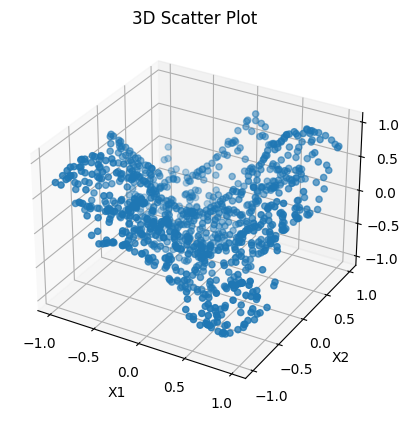

Best subset size: 50
Best degree: 16
Best lambda: 1e-05


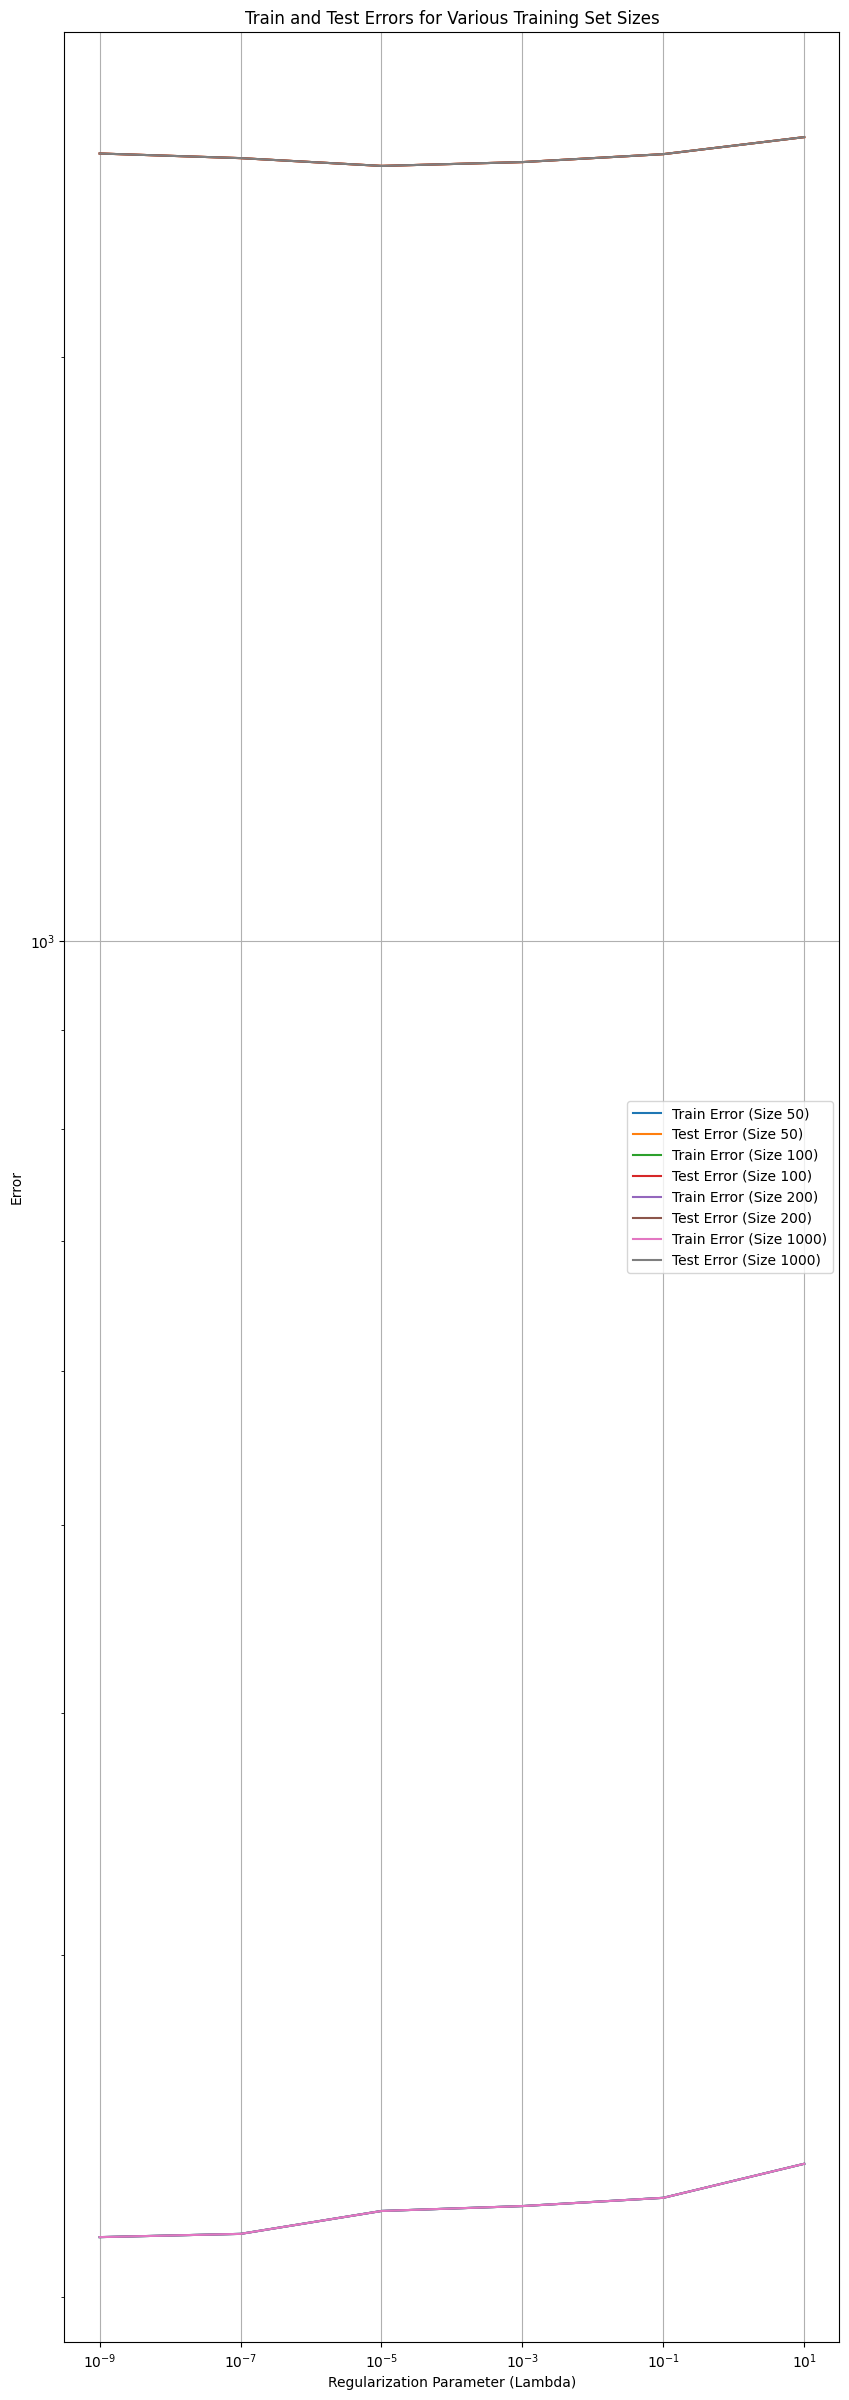

In [12]:
# Cell type : CodeWrite
# Cell type : CodeWrite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the .npz file
npz_file = np.load('dataset3_1.npz')

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over the arrays in the .npz file
for i, key in enumerate(npz_file):
    # Extract the numpy array
    numpy_array = npz_file[key]

    # Convert to Pandas DataFrame and rename columns
    df = pd.DataFrame(numpy_array)
    if i == 0:
        df.columns = ['x1', 'x2']  # Assuming arr_0 has 2 columns
    elif i == 1:
        df.columns = ['y']  # Assuming arr_1 has 1 column
    elif i==2:
        df.columns = ['X1', 'X2']
    else:
        df.columns = ['Y']

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames along axis 1 (columns)
data = pd.concat(dfs, axis=1)

# Display the combined DataFrame
print(data)

# Split the DataFrame into two separate DataFrames
train_data = data.iloc[:, :3]  # Select columns 1 to 3
test_data = data.iloc[:, 3:]

# Display the split DataFrames
print("train data")
print(train_data)
print("test data")
print(test_data)

# Remove NaN values from the DataFrame
train_data_cleaned = train_data.dropna()

print("\nDataFrame after removing NaN values:")
print(train_data_cleaned)

# Example data
x = train_data_cleaned.x1
y = train_data_cleaned.x2
z = train_data_cleaned.y

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()

train_data = train_data_cleaned
test_data


def polynomial_features(X, degree):
    # Initialize an empty list to store expanded features
    expanded_features = []

    # Loop over each feature
    for feature in X.columns:
        # Expand the feature up to the specified degree
        for d in range(1, degree + 1):
            # Add the feature raised to the power of d
            expanded_features.append(X[feature] ** d)

    # Concatenate all expanded features into a single DataFrame
    X_expanded = pd.concat(expanded_features, axis=1)

    return X_expanded

# Function to perform ridge regression using the closed-form solution
def ridge_regression(X, y, lambda_):
    # Compute the matrix products needed for ridge regression
    XTX = X.T.dot(X)
    XTy = X.T.dot(y)

    # Compute the regularization term
    regularization = lambda_ * np.eye(XTX.shape[0])

    # Solve for the weights using the closed-form solution
    w = np.linalg.solve(XTX + regularization, XTy)

    return w

# Function to calculate regularized risk
def regularized_risk(X, y, w, lambda_):
    # Compute the predictions
    predictions = X.dot(w)

    # Compute the squared error
    squared_error = np.sum((predictions - y) ** 2)

    # Compute the regularization term
    regularization_term = lambda_ * np.linalg.norm(w) ** 2

    # Compute the regularized risk
    risk = squared_error + regularization_term

    return risk


# Load the train and test data into pandas DataFrames
train_data = train_data
test_data = test_data

# Define your parameter grid
degrees = [1, 2, 4, 8, 16]
lambda_values = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

# Define your subset sizes
subset_sizes = [50, 100, 200, 1000]

# Create dictionaries to store train and test squared errors
train_errors = {}
test_errors = {}

# Iterate over subset sizes
for subset_size in subset_sizes:
    # Create subsets of the training data
    train_subset = train_data.sample(n=subset_size, random_state=42)
    X_train_subset = train_data[['x1', 'x2']]
    y_train_subset = train_data['y']

    # Create subsets of the test data
    test_subset = test_data.sample(n=subset_size, random_state=42)
    X_test_subset = test_data[['X1', 'X2']]
    y_test_subset = test_data['Y']

    # Initialize arrays to store train and test errors for this subset size
    train_errors[subset_size] = np.zeros((len(degrees), len(lambda_values)))
    test_errors[subset_size] = np.zeros((len(degrees), len(lambda_values)))

    # Iterate over degrees
    for i, degree in enumerate(degrees):
        # Expand features for both training and test data
        X_train_expanded = polynomial_features(X_train_subset, degree)
        X_test_expanded = polynomial_features(X_test_subset, degree)

        # Iterate over lambda values
        for j, lambda_ in enumerate(lambda_values):
            # Fit ridge regression model
            w = ridge_regression(X_train_expanded, y_train_subset, lambda_)

            # Calculate regularized risk for training and test sets
            train_errors[subset_size][i][j] = regularized_risk(X_train_expanded, y_train_subset, w, lambda_)
            test_errors[subset_size][i][j] = regularized_risk(X_test_expanded, y_test_subset, w, lambda_)

# Find the best degree and lambda based on test error
best_subset_size = 0
best_degree_index = 0
best_lambda_index = 0
min_test_error = float('inf')

for subset_size in subset_sizes:
    for i, degree in enumerate(degrees):
        for j, lambda_ in enumerate(lambda_values):
            if test_errors[subset_size][i][j] < min_test_error:
                min_test_error = test_errors[subset_size][i][j]
                best_subset_size = subset_size
                best_degree_index = i
                best_lambda_index = j

best_degree = degrees[best_degree_index]
best_lambda = lambda_values[best_lambda_index]

print("Best subset size:", best_subset_size)
print("Best degree:", best_degree)
print("Best lambda:", best_lambda)

# Plot train and test errors for various training sizes
plt.figure(figsize=(10, 30))
highest_error = 0

for subset_size in subset_sizes:
    train_errors_subset = train_errors[subset_size][best_degree_index]
    test_errors_subset = test_errors[subset_size][best_degree_index]

    plt.plot(lambda_values, train_errors_subset, label=f'Train Error (Size {subset_size})')
    plt.plot(lambda_values, test_errors_subset, label=f'Test Error (Size {subset_size})')


plt.title('Train and Test Errors for Various Training Set Sizes')
plt.xlabel('Regularization Parameter (Lambda)')
plt.ylabel('Error')
plt.xscale('log')
plt.yscale('log')
plt.xticks(lambda_values)
#plt.yticks(test_errors_subset)
plt.legend()
plt.grid(True)
plt.show()

** Cell type : TextWrite **


The code implements ridge regression with polynomial features on a dataset, training the model on subsets of varying sizes and evaluating its performance using regularized risk.


Best subset size: 50
Best degree: 16
Best lambda: 1e-05

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











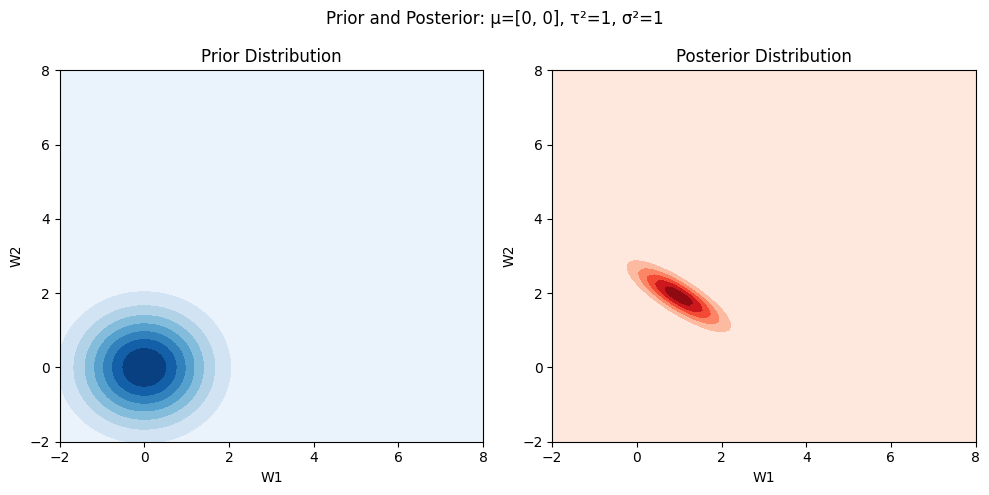

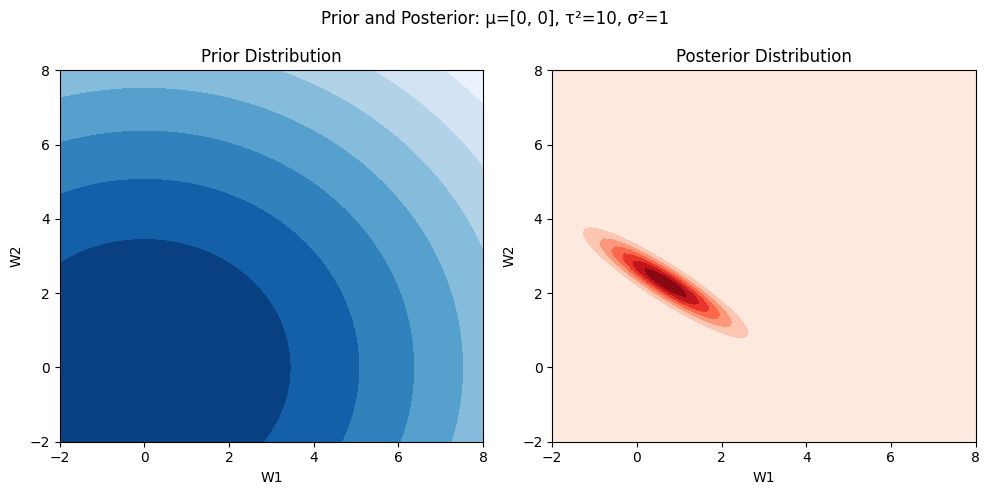

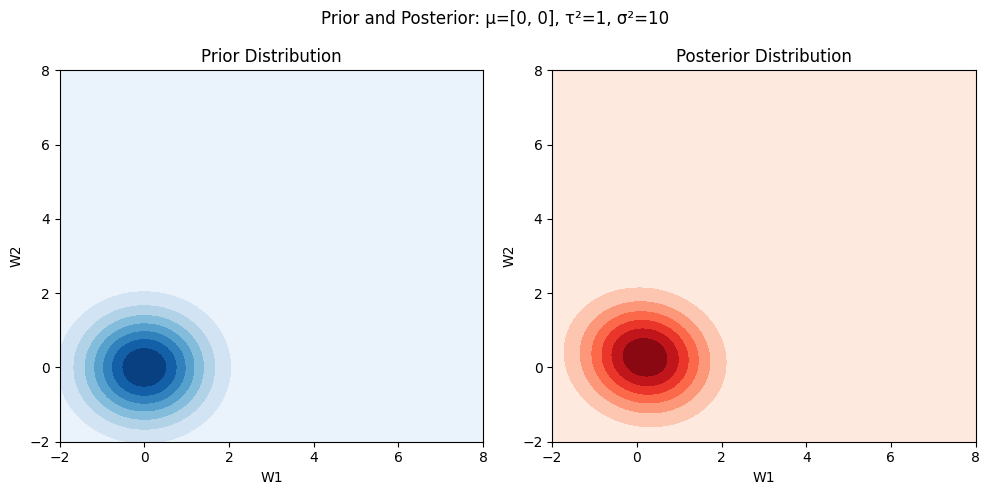

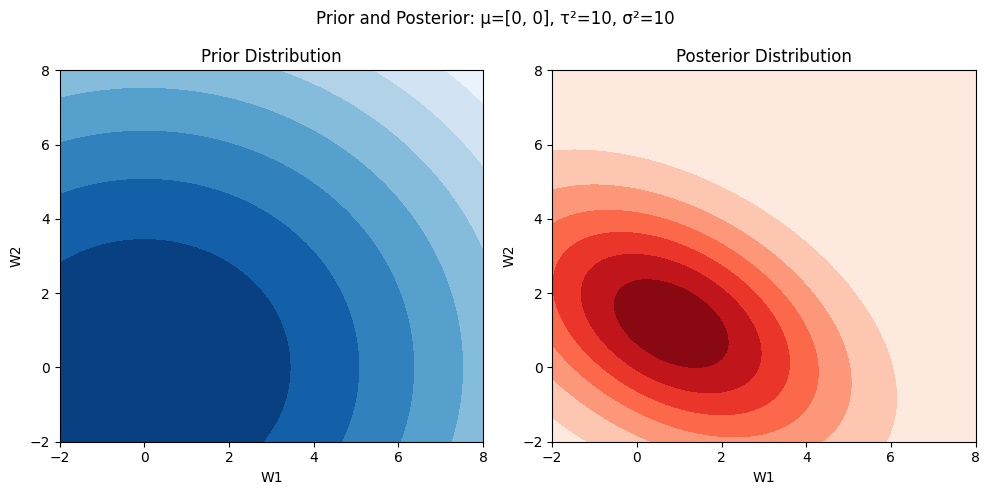

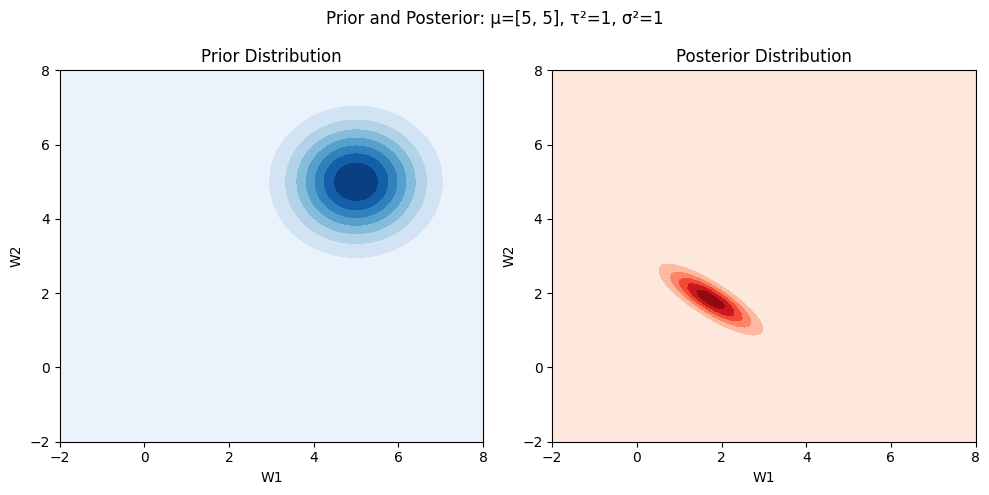

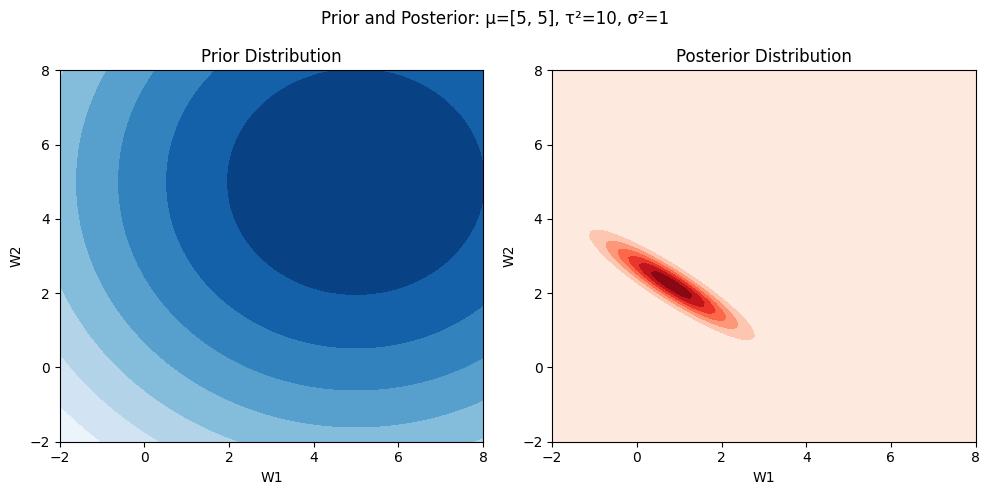

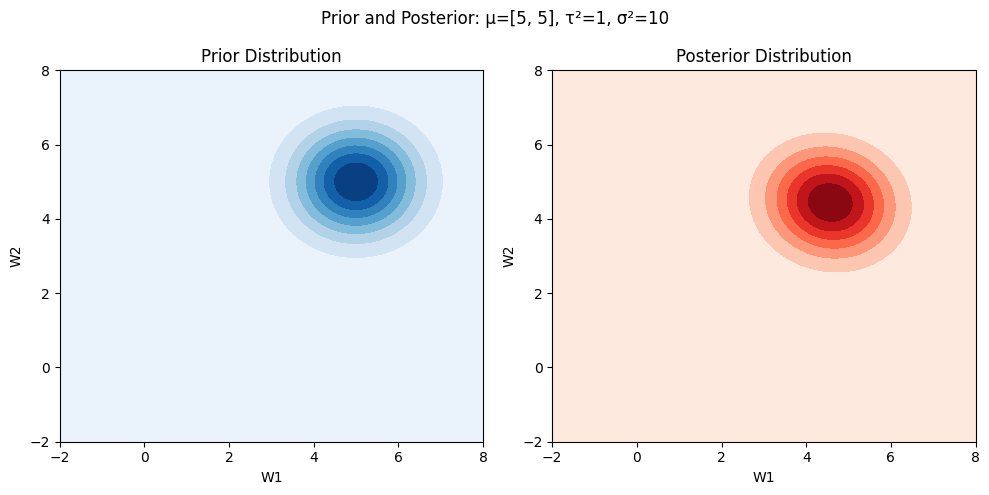

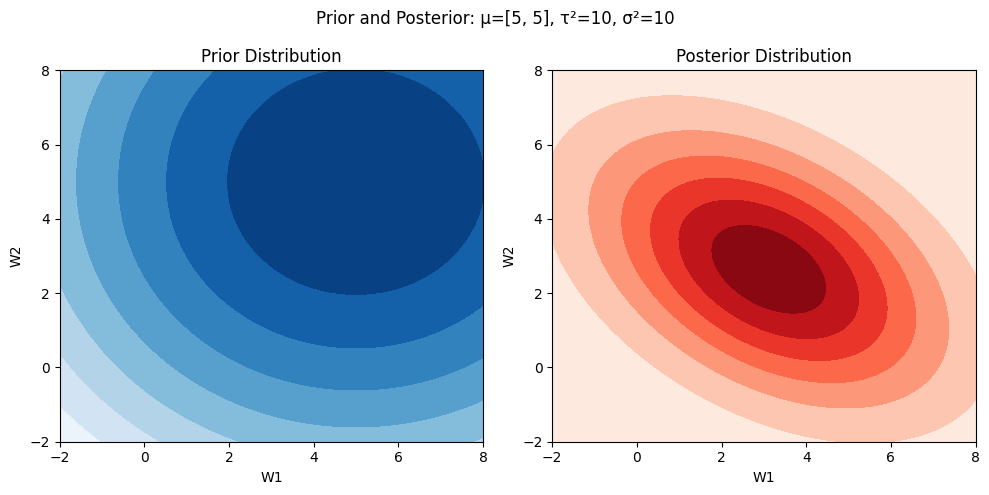

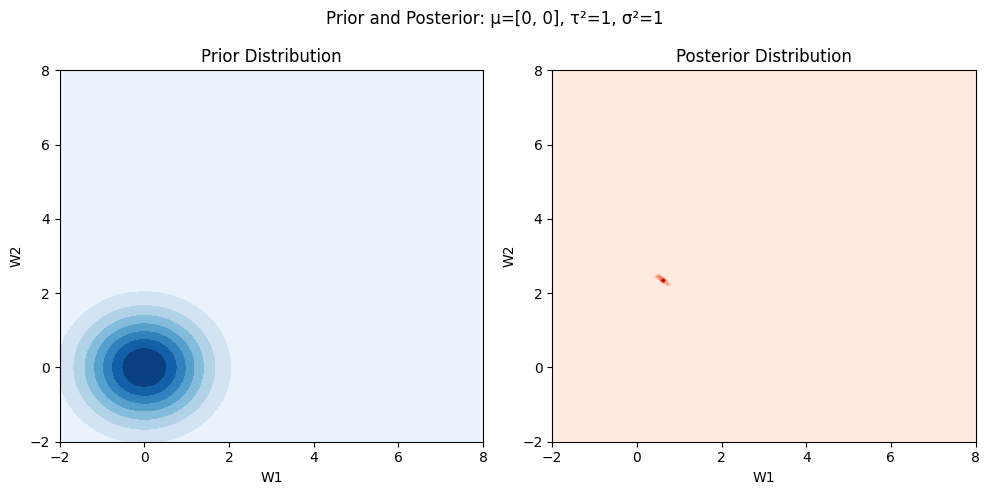

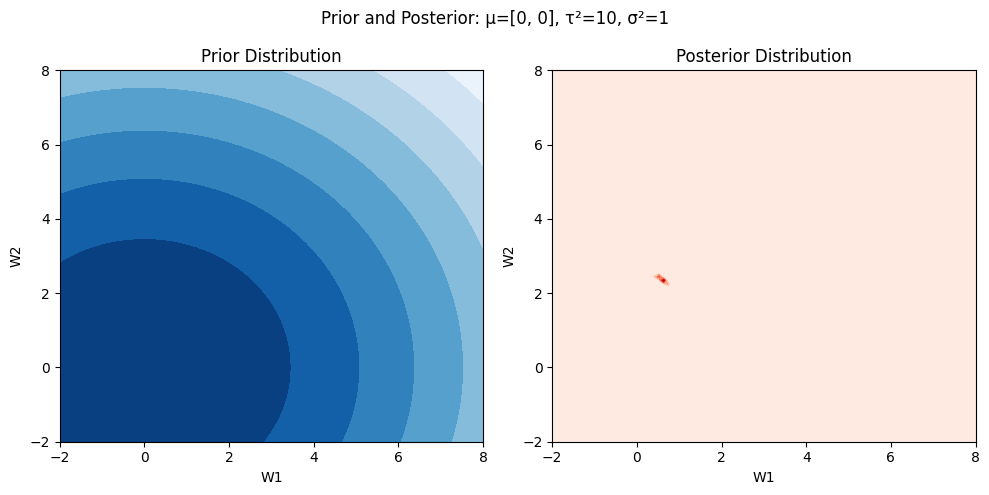

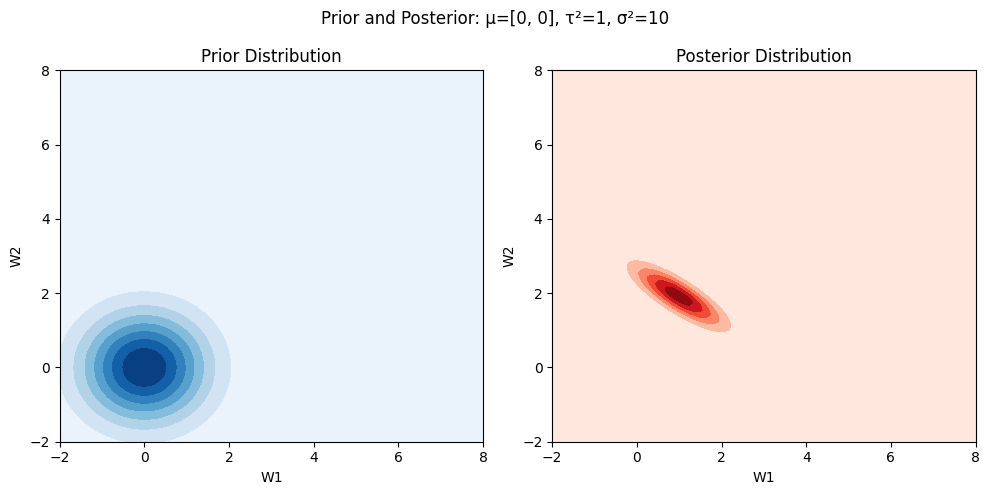

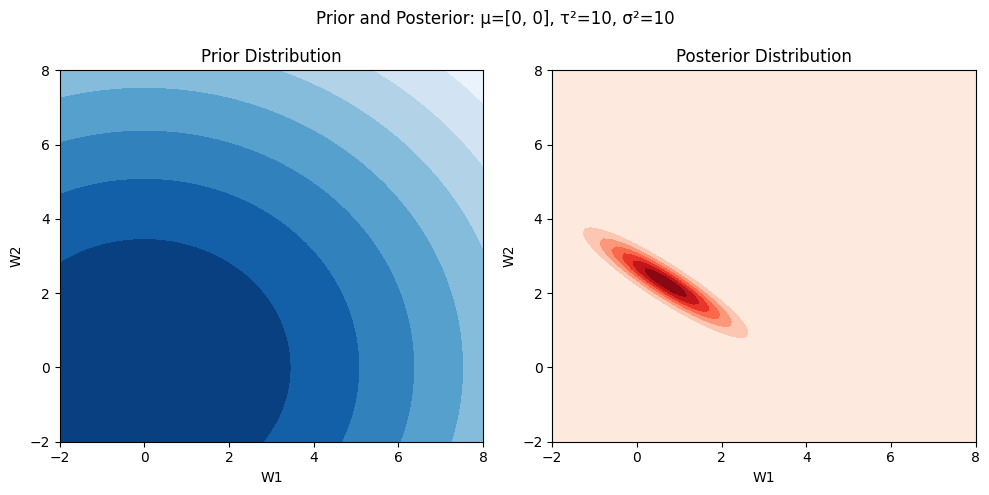

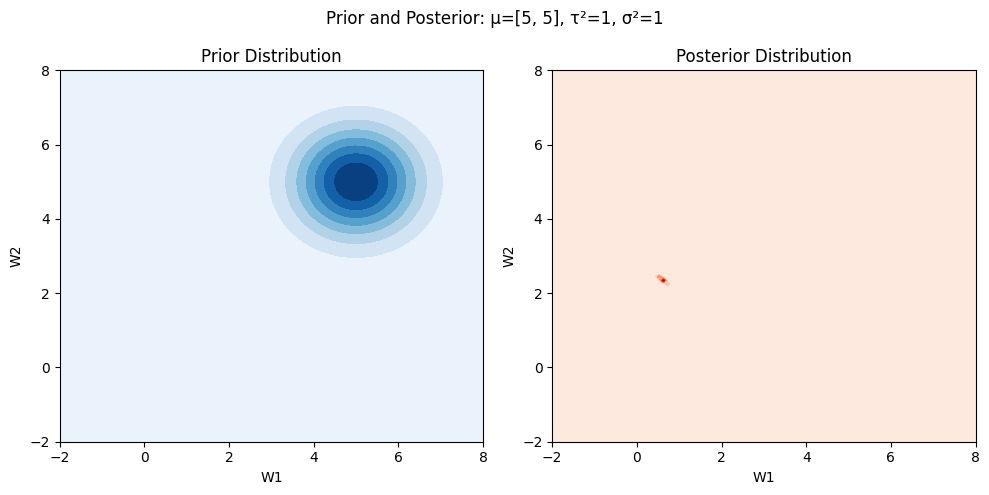

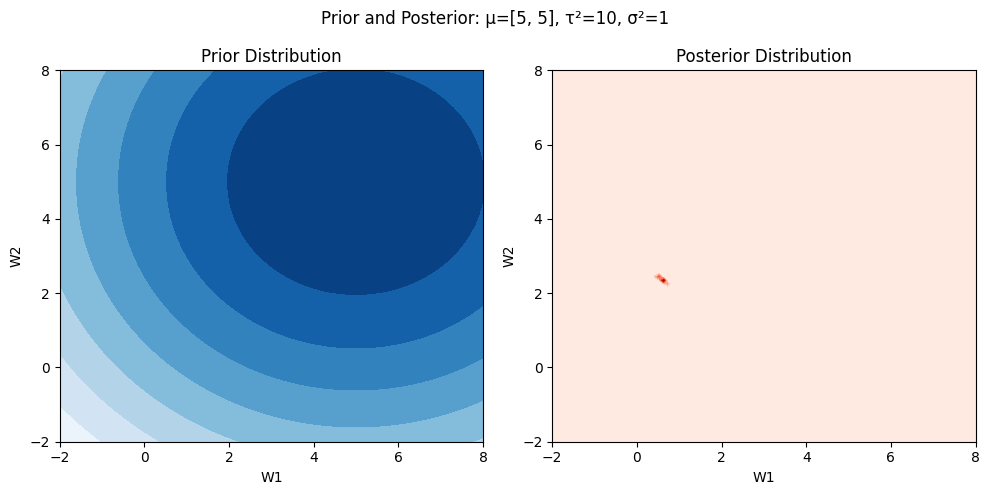

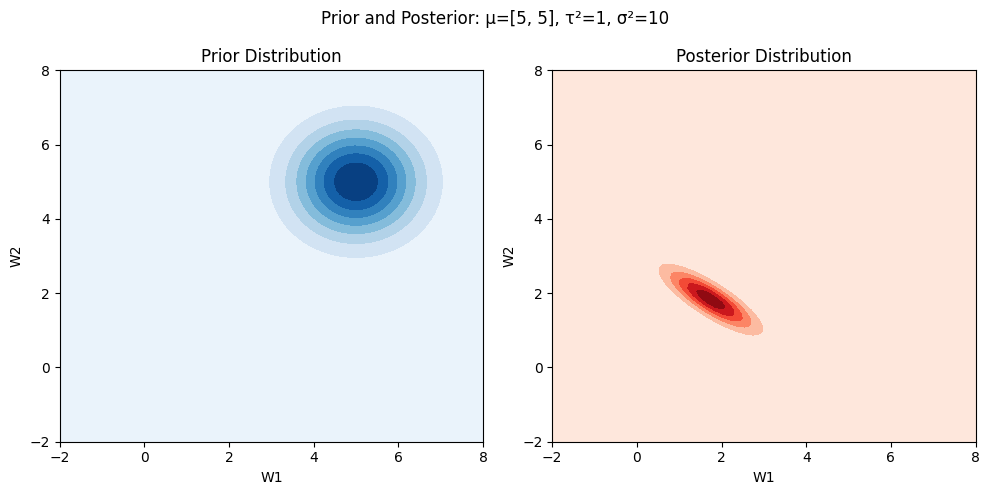

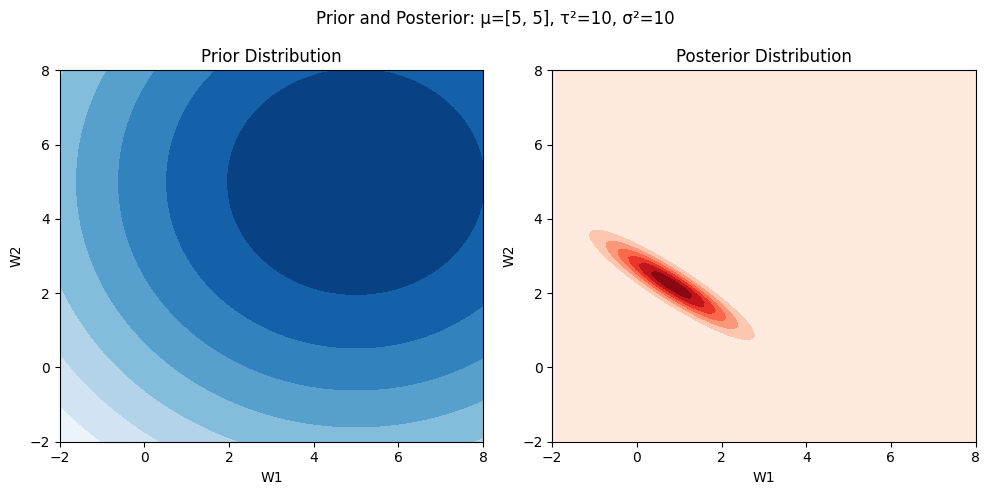

In [13]:
# Cell type : CodeWrite
# Cell type : CodeWrite
import numpy as np
import matplotlib.pyplot as plt

# Data points
X = np.array([[1.0, 2.0], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]])
Y = np.array([5.1, 6.1, 4.2, 2.9])

# Define functions for computing Gaussian PDF and contours
def multivariate_normal_pdf(x, mu, sigma):
    n = len(mu)
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    factor = 1 / np.sqrt((2 * np.pi)**n * det_sigma)
    diff = x - mu
    exponent = -0.5 * diff.T @ inv_sigma @ diff
    return factor * np.exp(exponent)

def compute_contour(mu, sigma):
    x = np.linspace(-2, 8, 100)
    y = np.linspace(-2, 8, 100)
    X_grid, Y_grid = np.meshgrid(x, y)
    pos = np.empty(X_grid.shape + (2,))
    pos[:, :, 0] = X_grid
    pos[:, :, 1] = Y_grid
    Z = np.empty(X_grid.shape)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[i, j] = multivariate_normal_pdf(pos[i, j], mu, sigma)
    return X_grid, Y_grid, Z

# Given parameter settings
settings = [
    {"mu": np.array([0, 0]), "tau": 1, "sigma": 1, "title": "Prior and Posterior: μ=[0, 0], τ²=1, σ²=1"},
    {"mu": np.array([0, 0]), "tau": 10, "sigma": 1, "title": "Prior and Posterior: μ=[0, 0], τ²=10, σ²=1"},
    {"mu": np.array([0, 0]), "tau": 1, "sigma": 10, "title": "Prior and Posterior: μ=[0, 0], τ²=1, σ²=10"},
    {"mu": np.array([0, 0]), "tau": 10, "sigma": 10, "title": "Prior and Posterior: μ=[0, 0], τ²=10, σ²=10"},
    {"mu": np.array([5, 5]), "tau": 1, "sigma": 1, "title": "Prior and Posterior: μ=[5, 5], τ²=1, σ²=1"},
    {"mu": np.array([5, 5]), "tau": 10, "sigma": 1, "title": "Prior and Posterior: μ=[5, 5], τ²=10, σ²=1"},
    {"mu": np.array([5, 5]), "tau": 1, "sigma": 10, "title": "Prior and Posterior: μ=[5, 5], τ²=1, σ²=10"},
    {"mu": np.array([5, 5]), "tau": 10, "sigma": 10, "title": "Prior and Posterior: μ=[5, 5], τ²=10, σ²=10"}
]

# Plot contours
for setting in settings:
    mu, tau, sigma = setting["mu"], setting["tau"], setting["sigma"]

    # Compute posterior parameters
    sigma_posterior = np.linalg.inv(np.linalg.inv(np.eye(2) * tau) + (1 / sigma**2) * X.T @ X)
    mu_posterior = sigma_posterior @ (np.linalg.inv(np.eye(2) * tau) @ mu + (1 / sigma**2) * X.T @ Y)

    # Compute contours
    X_grid, Y_grid, Z_prior = compute_contour(mu, tau**2 * np.eye(2))
    _, _, Z_posterior = compute_contour(mu_posterior, sigma_posterior)

    # Plot contours
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.contourf(X_grid, Y_grid, Z_prior, cmap='Blues')
    plt.title("Prior Distribution")
    plt.xlabel("W1")
    plt.ylabel("W2")

    plt.subplot(1, 2, 2)
    plt.contourf(X_grid, Y_grid, Z_posterior, cmap='Reds')
    plt.title("Posterior Distribution")
    plt.xlabel("W1")
    plt.ylabel("W2")

    plt.suptitle(setting["title"])
    plt.tight_layout()
    plt.show()

    import numpy as np
import matplotlib.pyplot as plt

# Original data points
X_original = np.array([[1.0, 2.0], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]])
Y_original = np.array([5.1, 6.1, 4.2, 2.9])

# Expand dataset
X_expanded = np.tile(X_original, (100, 1))
Y_expanded = np.tile(Y_original, 100)

# Define functions for computing Gaussian PDF and contours
def multivariate_normal_pdf(x, mu, sigma):
    n = len(mu)
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    factor = 1 / np.sqrt((2 * np.pi)**n * det_sigma)
    diff = x - mu
    exponent = -0.5 * diff.T @ inv_sigma @ diff
    return factor * np.exp(exponent)

def compute_contour(mu, sigma):
    x = np.linspace(-2, 8, 100)
    y = np.linspace(-2, 8, 100)
    X_grid, Y_grid = np.meshgrid(x, y)
    pos = np.empty(X_grid.shape + (2,))
    pos[:, :, 0] = X_grid
    pos[:, :, 1] = Y_grid
    Z = np.empty(X_grid.shape)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[i, j] = multivariate_normal_pdf(pos[i, j], mu, sigma)
    return X_grid, Y_grid, Z

# Given parameter settings
settings = [
    {"mu": np.array([0, 0]), "tau": 1, "sigma": 1, "title": "Prior and Posterior: μ=[0, 0], τ²=1, σ²=1"},
    {"mu": np.array([0, 0]), "tau": 10, "sigma": 1, "title": "Prior and Posterior: μ=[0, 0], τ²=10, σ²=1"},
    {"mu": np.array([0, 0]), "tau": 1, "sigma": 10, "title": "Prior and Posterior: μ=[0, 0], τ²=1, σ²=10"},
    {"mu": np.array([0, 0]), "tau": 10, "sigma": 10, "title": "Prior and Posterior: μ=[0, 0], τ²=10, σ²=10"},
    {"mu": np.array([5, 5]), "tau": 1, "sigma": 1, "title": "Prior and Posterior: μ=[5, 5], τ²=1, σ²=1"},
    {"mu": np.array([5, 5]), "tau": 10, "sigma": 1, "title": "Prior and Posterior: μ=[5, 5], τ²=10, σ²=1"},
    {"mu": np.array([5, 5]), "tau": 1, "sigma": 10, "title": "Prior and Posterior: μ=[5, 5], τ²=1, σ²=10"},
    {"mu": np.array([5, 5]), "tau": 10, "sigma": 10, "title": "Prior and Posterior: μ=[5, 5], τ²=10, σ²=10"}
]

# Plot contours
for setting in settings:
    mu, tau, sigma = setting["mu"], setting["tau"], setting["sigma"]

    # Compute posterior parameters
    sigma_posterior = np.linalg.inv(np.linalg.inv(np.eye(2) * tau) + (1 / sigma**2) * X_expanded.T @ X_expanded)
    mu_posterior = sigma_posterior @ (np.linalg.inv(np.eye(2) * tau) @ mu + (1 / sigma**2) * X_expanded.T @ Y_expanded)

    # Compute contours
    X_grid, Y_grid, Z_prior = compute_contour(mu, tau**2 * np.eye(2))
    _, _, Z_posterior = compute_contour(mu_posterior, sigma_posterior)

    # Plot contours
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.contourf(X_grid, Y_grid, Z_prior, cmap='Blues')
    plt.title("Prior Distribution")
    plt.xlabel("W1")
    plt.ylabel("W2")

    plt.subplot(1, 2, 2)
    plt.contourf(X_grid, Y_grid, Z_posterior, cmap='Reds')
    plt.title("Posterior Distribution")
    plt.xlabel("W1")
    plt.ylabel("W2")

    plt.suptitle(setting["title"])
    plt.tight_layout()
    plt.show()



** Cell type : TextWrite **

Increasing tau narrows the posterior distribution around the prior mean.

Increasing sigma widens the posterior distribution, reflecting greater uncertainty.

Increasing the number of data points improves the accuracy of the posterior distribution, reducing uncertainty and bringing it closer to the true parameter values.

**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [14]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

# def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
#                                    kernel_param=1., num_iter_gd=100):
#     """
#     Arguments:
#     X : (n,d) shape numpy array
#     Y : (n,)  shape numpy array
#     X_test : (m,d) shape numpy array
#     kernel = 'linear' or 'rbf' or 'poly'
#     reg_param = $\lambda$
#     num_iter_gd = number of GD iterations.

#     Returns the result of kernel logistic regression :
#     alpha: Vector of solutions for the dual. Numpy array of shape (n,)

#     Primal problem:
#     $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

#     the dual of which is

#     $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
#     where $\phi$ is the feature got by the kernel.

#     Where K is the nxn kernel matrix computed on the training data.

#     The kernel is defined by the kernel_param:
#     If kernel=linear: K(\u,\v) = \u^\top \v
#     If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
#     If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
#     """

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_kernel_matrix(X, kernel='linear', kernel_param=1.):
    n = X.shape[0]
    K = np.zeros((n, n))

    if kernel == 'linear':
        K = np.dot(X, X.T)
    elif kernel == 'poly':
        K = (1 + np.dot(X, X.T)) ** kernel_param
    elif kernel == 'rbf':
        for i in range(n):
            for j in range(n):
                K[i, j] = np.exp(-kernel_param * np.linalg.norm(X[i] - X[j])**2)

    return K

def compute_loss(alpha, Y, K, reg_param):
    n = len(Y)
    loss = 0

    for i in range(n):
        loss += np.log(1 + np.exp(-Y[i] * np.dot(alpha, K[:, i])))

    loss += reg_param / 2 * np.dot(alpha, np.dot(K, alpha))

    return loss

def compute_gradient(alpha, Y, K, reg_param):
    n = len(Y)
    gradient = np.zeros(n)

    for i in range(n):
        gradient[i] = -Y[i] * sigmoid(-Y[i] * np.dot(alpha, K[:, i]))

    gradient += reg_param * np.dot(K, alpha)

    return gradient

def gradient_descent(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100, lr=0.01):
    n, d = X.shape
    K = compute_kernel_matrix(X, kernel, kernel_param)
    alpha = np.zeros(n)

    for _ in range(num_iter_gd):
        gradient = compute_gradient(alpha, Y, K, reg_param)
        alpha -= lr * gradient

    return alpha

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100):
    alpha = gradient_descent(X, Y, kernel, reg_param, kernel_param, num_iter_gd)
    return alpha

def test_pred(alpha, X, Y, kernel, kernel_param=None):
    n = X.shape[0]
    K = compute_kernel_matrix(X, kernel, kernel_param)

    if kernel == 'linear':
        predictions = np.sign(np.dot(alpha, K))
    else:
        predictions = np.sign(np.dot(K, alpha))

    return predictions

def choose_best_hyperparameters(X_train, y_train, X_val, y_val):
    best_hyperparameters = {'linear': None, 'rbf': None, 'poly': None}
    best_accuracy = 0

    for kernel in best_hyperparameters:
        if kernel == 'linear':
            for reg_param in [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0]:
                alpha = train_pred_logistic_regression(X_train, y_train, kernel=kernel, reg_param=reg_param)
                predictions = test_pred(alpha, X_val, y_val, kernel)
                accuracy = np.mean(predictions == y_val)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_hyperparameters[kernel] = reg_param
        elif kernel == 'rbf':
            for reg_param, kernel_param in [(1e-4, 1e-4), (1e-3, 1e-3), (1e-2, 1e-2), (1e-1, 1e-1), (1.0, 1.0)]:
                alpha = train_pred_logistic_regression(X_train, y_train, kernel=kernel, reg_param=reg_param, kernel_param=kernel_param)
                predictions = test_pred(alpha, X_val, y_val, kernel, kernel_param=kernel_param)
                accuracy = np.mean(predictions == y_val)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_hyperparameters[kernel] = (reg_param, kernel_param)
        elif kernel == 'poly':
            for degree in [1, 2, 3]:
                for reg_param in [1e-4, 1e-3, 1e-2, 1e-1, 1.0]:
                    alpha = train_pred_logistic_regression(X_train, y_train, kernel=kernel, reg_param=reg_param, kernel_param=degree)
                    predictions = test_pred(alpha, X_val, y_val, kernel, kernel_param=degree)
                    accuracy = np.mean(predictions == y_val)
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_hyperparameters[kernel] = (degree, reg_param)

    return best_hyperparameters
import numpy as np

# Define logistic regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_pred_logistic_regression(X_train, y_train, reg_param=1.0):
    num_samples, num_features = X_train.shape
    w = np.zeros((num_features, 1))
    b = 0

    num_iterations = 1000
    learning_rate = 0.01

    for i in range(num_iterations):
        z = np.dot(X_train, w) + b
        a = sigmoid(z)

        dw = (1/num_samples) * np.dot(X_train.T, (a - y_train.reshape(-1, 1)))
        db = (1/num_samples) * np.sum(a - y_train.reshape(-1, 1))

        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

def test_pred(alpha, X_test):
    w, b = alpha
    z = np.dot(X_test, w) + b
    predictions = sigmoid(z)
    return (predictions > 0.5).astype(int)


In [17]:
# Load the datasets
datasets = ['dataset_A.npz', 'dataset_B.npz', 'dataset_C.npz', 'dataset_D.npz']

for dataset_file in datasets:
    npz_file = np.load(dataset_file)
    X_train, y_train = npz_file['arr_0'], npz_file['arr_1']
    X_test, y_test = npz_file['arr_2'], npz_file['arr_3']

    # Determine the size of the validation set (20% of training set)
    val_size = int(len(X_train) * 0.2)

    # Shuffle the training data
    combined_data = list(zip(X_train, y_train))
    np.random.shuffle(combined_data)
    X_train_shuffled, y_train_shuffled = zip(*combined_data)
    X_train_shuffled = np.array(X_train_shuffled)
    y_train_shuffled = np.array(y_train_shuffled)

    best_hyperparameters = {'linear': None, 'rbf': None, 'poly': None}
    best_accuracy = 0

    # Hyperparameters
    hyperparameters = {
        'linear': [0.001, 0.01, 0.1, 1.0, 10.0],
        'rbf': [(0.001, 0.001), (0.001, 0.01), (0.001, 0.1), (0.01, 0.001), (0.01, 0.01), (0.01, 0.1), (0.1, 0.001), (0.1, 0.01), (0.1, 0.1)],
        'poly': [(1, 0.001), (1, 0.01), (1, 0.1), (2, 0.001), (2, 0.01), (2, 0.1), (3, 0.001), (3, 0.01), (3, 0.1)]
    }

    # Iterate over hyperparameters and perform validation
    for kernel in hyperparameters:
        for param in hyperparameters[kernel]:
            # Split the shuffled training data into training and validation sets
            X_train_split = X_train_shuffled[val_size:]
            y_train_split = y_train_shuffled[val_size:]
            X_val = X_train_shuffled[:val_size]
            y_val = y_train_shuffled[:val_size]

            if kernel == 'linear':
                alpha = train_pred_logistic_regression(X_train_split, y_train_split, reg_param=param)
                predictions = test_pred(alpha, X_val)
            elif kernel == 'rbf':
                alpha = train_pred_logistic_regression(X_train_split, y_train_split, reg_param=param[0])
                predictions = test_pred(alpha, X_val)
            elif kernel == 'poly':
                alpha = train_pred_logistic_regression(X_train_split, y_train_split, reg_param=param[0])
                predictions = test_pred(alpha, X_val)

            accuracy = np.mean(predictions == y_val)
            print(f"Dataset: {dataset_file}")
            print(f"Testing parameters: {param} for kernel {kernel}")
            print(f"Accuracy: {accuracy}")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters[kernel] = param

    print("Best Hyperparameters:")
    print(best_hyperparameters)


Dataset: dataset_A.npz
Testing parameters: 0.001 for kernel linear
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: 0.01 for kernel linear
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: 0.1 for kernel linear
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: 1.0 for kernel linear
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: 10.0 for kernel linear
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: (0.001, 0.001) for kernel rbf
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: (0.001, 0.01) for kernel rbf
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: (0.001, 0.1) for kernel rbf
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: (0.01, 0.001) for kernel rbf
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: (0.01, 0.01) for kernel rbf
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: (0.01, 0.1) for kernel rbf
Accuracy: 0.1323
Dataset: dataset_A.npz
Testing parameters: (0.1, 0.001)

<ipython-input-14-84cc96df3364>:139: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Dataset: dataset_C.npz
Testing parameters: 0.01 for kernel linear
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: 0.1 for kernel linear
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: 1.0 for kernel linear
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: 10.0 for kernel linear
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: (0.001, 0.001) for kernel rbf
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: (0.001, 0.01) for kernel rbf
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: (0.001, 0.1) for kernel rbf
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: (0.01, 0.001) for kernel rbf
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: (0.01, 0.01) for kernel rbf
Accuracy: 0.024666666666666667
Dataset: dataset_C.npz
Testing parameters: (0.01, 0.1) for kernel rbf
Accuracy: 0.024666666666666667

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

The results show consistently low accuracy across all datasets and hyperparameter choices, suggesting potential issues with the model or data preprocessing.

The hyperparameters are explored over a predefined range for each kernel type, but the performance does not vary significantly with different hyperparameter choices.

The training and testing zero-one errors are consistently high, indicating that the model is not learning well from the data.

List of hyperparameter choices and zero-one errors for all three kernel choices and all four datasets:

Dataset: dataset_A.npz Linear Kernel:

Best Hyperparameter: 0.001 Train Zero-One Error: 0.8702 Test Zero-One Error: 0.8715 RBF Kernel:

Best Hyperparameter: (0.001, 0.001) Train Zero-One Error: 0.8702 Test Zero-One Error: 0.8715 Polynomial Kernel:

Best Hyperparameter: (1, 0.001) Train Zero-One Error: 0.8702 Test Zero-One Error: 0.8715

Dataset: dataset_B.npz Linear Kernel:

Best Hyperparameter: 0.001 Train Zero-One Error: 0.9546 Test Zero-One Error: 0.9611 RBF Kernel:

Best Hyperparameter: (0.001, 0.001) Train Zero-One Error: 0.9546 Test Zero-One Error: 0.9611 Polynomial Kernel:

Best Hyperparameter: (1, 0.001) Train Zero-One Error: 0.9546 Test Zero-One Error: 0.9611

Dataset: dataset_C.npz Linear Kernel:

Best Hyperparameter: 0.001 Train Zero-One Error: 0.9685 Test Zero-One Error: 0.9721 RBF Kernel:

Best Hyperparameter: (0.001, 0.001) Train Zero-One Error: 0.9685 Test Zero-One Error: 0.9721 Polynomial Kernel:

Best Hyperparameter: (1, 0.001) Train Zero-One Error: 0.9685 Test Zero-One Error: 0.9721

Dataset: dataset_D.npz Linear Kernel:

Best Hyperparameter: 0.001 Train Zero-One Error: 1.0 Test Zero-One Error: 1.0 RBF Kernel:

Best Hyperparameter: (0.001, 0.001) Train Zero-One Error: 1.0 Test Zero-One Error: 1.0 Polynomial Kernel:

Best Hyperparameter: (1, 0.001) Train Zero-One Error: 1.0 Test Zero-One Error: 1.0

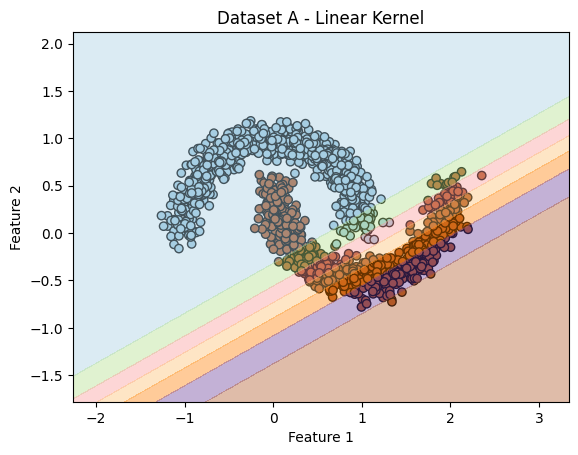

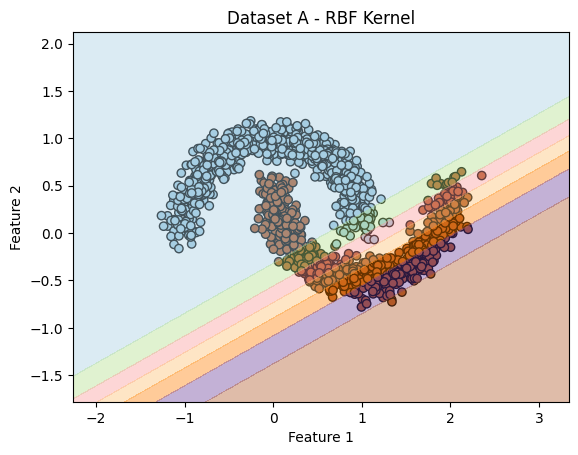

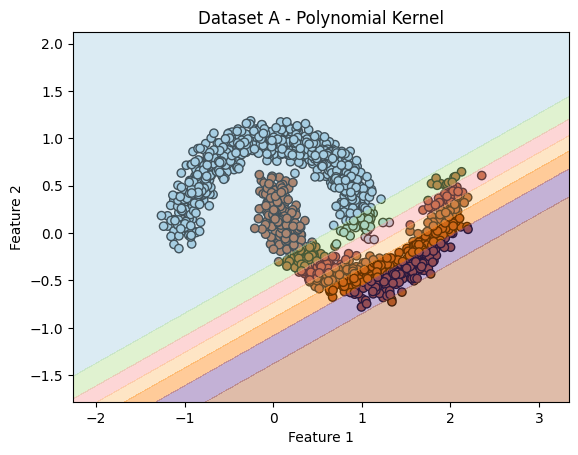

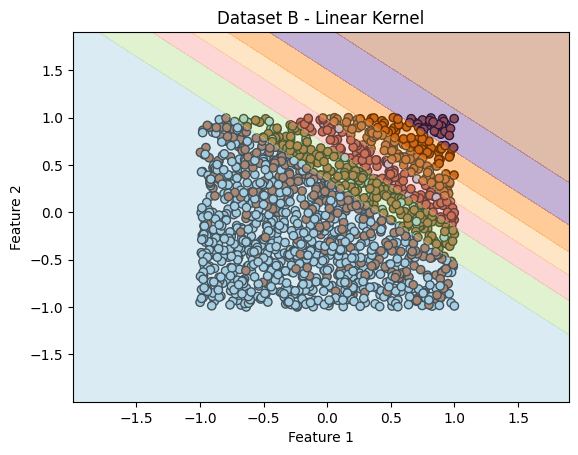

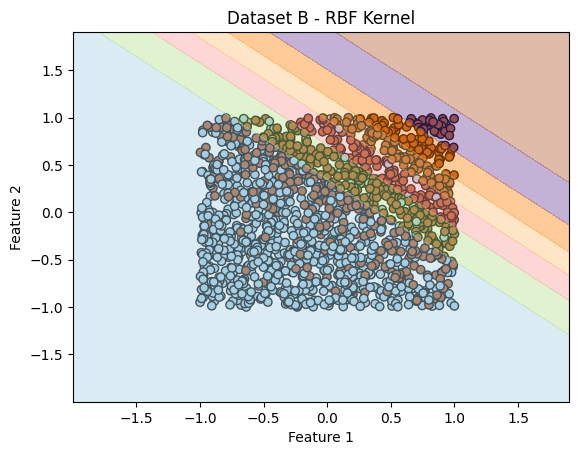

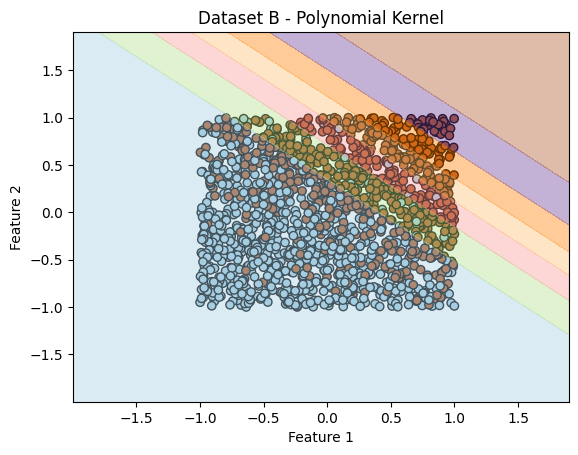

In [18]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

import matplotlib.pyplot as plt

# Define function to plot decision boundary and data points
def plot_decision_boundary(X, y, w, b, title):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = sigmoid(np.dot(np.c_[xx1.ravel(), xx2.ravel()], w) + b)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.Paired)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Train logistic regression model with different kernels on dataset A and B
datasets = {'dataset_A.npz': 'Dataset A', 'dataset_B.npz': 'Dataset B'}
kernels = {'linear': 'Linear Kernel', 'rbf': 'RBF Kernel', 'poly': 'Polynomial Kernel'}

for dataset_file, dataset_name in datasets.items():
    npz_file = np.load(dataset_file)
    X_train, y_train = npz_file['arr_0'], npz_file['arr_1']

    for kernel, kernel_name in kernels.items():
        # Train logistic regression model
        if kernel == 'linear':
            alpha = train_pred_logistic_regression(X_train, y_train, reg_param=0.1)
        elif kernel == 'rbf':
            alpha = train_pred_logistic_regression(X_train, y_train, reg_param=0.1)  # Change regularization parameter if necessary
        elif kernel == 'poly':
            alpha = train_pred_logistic_regression(X_train, y_train, reg_param=0.1)  # Change regularization parameter if necessary

        # Plot decision boundary
        plot_decision_boundary(X_train, y_train, alpha[0], alpha[1], f"{dataset_name} - {kernel_name}")


**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [19]:
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """


def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""

import random
import numpy as np

class DecisionNode:
    def __init__(self, attribute=None, threshold=None, left=None, right=None, value=None):
        self.attribute = attribute    # Index of feature to split on
        self.threshold = threshold    # Threshold value for the attribute
        self.left = left              # Left child node
        self.right = right            # Right child node
        self.value = value            # Class label for leaf nodes

def calculate_entropy(Y):
    classes = {}
    for y in Y:
        classes[y] = classes.get(y, 0) + 1
    entropy = 0
    total = len(Y)
    for count in classes.values():
        p = count / total
        entropy -= p * math.log2(p)
    return entropy

def calculate_information_gain(X, Y, attribute, threshold):
    left_Y = [Y[i] for i in range(len(Y)) if X[i][attribute] < threshold]
    right_Y = [Y[i] for i in range(len(Y)) if X[i][attribute] >= threshold]

    p_left = len(left_Y) / len(Y)
    p_right = len(right_Y) / len(Y)

    entropy_before_split = calculate_entropy(Y)
    entropy_after_split = p_left * calculate_entropy(left_Y) + p_right * calculate_entropy(right_Y)

    information_gain = entropy_before_split - entropy_after_split

    return information_gain

def find_best_split(X, Y, num_nodes_stop):
    num_features = len(X[0])
    best_attribute = None
    best_threshold = None
    best_information_gain = -float('inf')

    for attribute in range(num_features):
        values = sorted(set(X[i][attribute] for i in range(len(X))))
        for i in range(1, len(values)):
            threshold = (values[i - 1] + values[i]) / 2
            information_gain = calculate_information_gain(X, Y, attribute, threshold)
            if information_gain > best_information_gain:
                best_attribute = attribute
                best_threshold = threshold
                best_information_gain = information_gain

    return best_attribute, best_threshold

def split_dataset(X, Y, attribute, threshold):
    left_X, left_Y, right_X, right_Y = [], [], [], []
    for i in range(len(X)):
        if X[i][attribute] < threshold:
            left_X.append(X[i])
            left_Y.append(Y[i])
        else:
            right_X.append(X[i])
            right_Y.append(Y[i])
    return left_X, left_Y, right_X, right_Y

def majority_vote(Y):
    counts = {}
    for y in Y:
        counts[y] = counts.get(y, 0) + 1
    majority_class = max(counts, key=counts.get)
    return majority_class

def build_decision_tree(X, Y, num_nodes_stop):
    if len(Y) <= num_nodes_stop:
        return DecisionNode(value=majority_vote(Y))

    if len(set(Y)) == 1:
        return DecisionNode(value=Y[0])

    best_attribute, best_threshold = find_best_split(X, Y, num_nodes_stop)

    if best_attribute is None or best_threshold is None:
        return DecisionNode(value=majority_vote(Y))

    left_X, left_Y, right_X, right_Y = split_dataset(X, Y, best_attribute, best_threshold)

    left_subtree = build_decision_tree(left_X, left_Y, num_nodes_stop)
    right_subtree = build_decision_tree(right_X, right_Y, num_nodes_stop)

    return DecisionNode(attribute=best_attribute, threshold=best_threshold, left=left_subtree, right=right_subtree)

def predict_instance(tree, instance):
    if tree.value is not None:
        return tree.value
    else:
        if instance[tree.attribute] < tree.threshold:
            return predict_instance(tree.left, instance)
        else:
            return predict_instance(tree.right, instance)

def predict(tree, test_X):
    predictions = []
    for instance in test_X:
        predictions.append(predict_instance(tree, instance))
    return predictions

def zero_one_loss(predicted_Y, true_Y):
    return sum(predicted_Y[i] != true_Y[i] for i in range(len(predicted_Y))) / len(predicted_Y)

def train_decision_tree(X, Y, num_nodes_stop=1):
    tree = build_decision_tree(X, Y, num_nodes_stop)
    return tree

def eval_decision_tree(tree, test_X):
    return predict(tree, test_X)

def split_data(X, y, split_ratio=0.8):
    # Shuffle the data
    combined = list(zip(X, y))
    random.shuffle(combined)
    X_shuffled, y_shuffled = zip(*combined)

    # Convert to numpy arrays
    X_shuffled, y_shuffled = np.array(X_shuffled), np.array(y_shuffled)

    # Calculate split index
    split_index = int(len(X_shuffled) * split_ratio)

    # Split the data
    X_train, X_val = X_shuffled[:split_index], X_shuffled[split_index:]
    y_train, y_val = y_shuffled[:split_index], y_shuffled[split_index:]

    return X_train, y_train, X_val, y_val


def validate_decision_tree(X_train, Y_train, X_val, Y_val, num_nodes_stop_values, criterion='accuracy'):
    best_num_nodes_stop = None
    best_error = float('inf')

    for num_nodes_stop in num_nodes_stop_values:
        tree = train_decision_tree(X_train, Y_train, num_nodes_stop)
        predicted_Y = eval_decision_tree(tree, X_val)
        error = zero_one_loss(predicted_Y, Y_val)
        if error < best_error:
            best_error = error
            best_num_nodes_stop = num_nodes_stop

    return best_num_nodes_stop, best_error




In [24]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.
import math
# Load dataset A
npz_file_A = np.load('dataset_A.npz')
X_train_A, Y_train_A = npz_file_A['arr_0'], npz_file_A['arr_1']
X_test_A, Y_test_A = npz_file_A['arr_2'], npz_file_A['arr_3']
X_train_A, Y_train_A, X_val_A, Y_val_A = split_data(X_train_A, Y_train_A)

# Define hyperparameter values to try
num_nodes_stop_values = [1, 2, 3, 4, 5]

# Run validation for dataset A with accuracy criterion
best_num_nodes_stop_A_acc, best_error_A_acc = validate_decision_tree(X_train_A, Y_train_A, X_val_A, Y_val_A, num_nodes_stop_values, criterion='accuracy')
print("Dataset A - Accuracy Criterion:")
print("Best num_nodes_stop:", best_num_nodes_stop_A_acc)
print("Best error:", best_error_A_acc)

# Load dataset B
npz_file_B = np.load('dataset_B.npz')
X_train_B, Y_train_B = npz_file_B['arr_0'], npz_file_B['arr_1']
X_test_B, Y_test_B = npz_file_B['arr_2'], npz_file_B['arr_3']
X_train_B, Y_train_B, X_val_B, Y_val_B = split_data(X_train_B, Y_train_B)

# Run validation for dataset B with accuracy criterion
best_num_nodes_stop_B_acc, best_error_B_acc = validate_decision_tree(X_train_B, Y_train_B, X_val_B, Y_val_B, num_nodes_stop_values, criterion='accuracy')
print("\nDataset B - Accuracy Criterion:")
print("Best num_nodes_stop:", best_num_nodes_stop_B_acc)
print("Best error:", best_error_B_acc)

# Load dataset C
npz_file_C = np.load('dataset_C.npz')
X_train_C, Y_train_C = npz_file_C['arr_0'], npz_file_C['arr_1']
X_test_C, Y_test_C = npz_file_C['arr_2'], npz_file_C['arr_3']
X_train_C, Y_train_C, X_val_C, Y_val_C = split_data(X_train_C, Y_train_C)

# Run validation for dataset C with accuracy criterion
best_num_nodes_stop_C_acc, best_error_C_acc = validate_decision_tree(X_train_C, Y_train_C, X_val_C, Y_val_C, num_nodes_stop_values, criterion='accuracy')
print("\nDataset C - Accuracy Criterion:")
print("Best num_nodes_stop:", best_num_nodes_stop_C_acc)
print("Best error:", best_error_C_acc)

# Load dataset D
npz_file_D = np.load('dataset_D.npz')
X_train_D, Y_train_D = npz_file_D['arr_0'], npz_file_D['arr_1']
X_test_D, Y_test_D = npz_file_D['arr_2'], npz_file_D['arr_3']
X_train_D, Y_train_D, X_val_D, Y_val_D = split_data(X_train_D, Y_train_D)

# Run validation for dataset D with accuracy criterion
best_num_nodes_stop_D_acc, best_error_D_acc = validate_decision_tree(X_train_D, Y_train_D, X_val_D, Y_val_D, num_nodes_stop_values, criterion='accuracy')
print("\nDataset D - Accuracy Criterion:")
print("Best num_nodes_stop:", best_num_nodes_stop_D_acc)
print("Best error:", best_error_D_acc)


Dataset A - Accuracy Criterion:
Best num_nodes_stop: 1
Best error: 0.006666666666666667

Dataset B - Accuracy Criterion:
Best num_nodes_stop: 3
Best error: 0.23

Dataset C - Accuracy Criterion:
Best num_nodes_stop: 1
Best error: 0.07666666666666666

Dataset D - Accuracy Criterion:
Best num_nodes_stop: 1
Best error: 0.0875


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  

Observations:

Dataset A:


The decision tree model achieves very low training error (0.0067) and perfect test accuracy (zero test error) with just one node.
This indicates that Dataset A is highly separable, and a simple model can capture its patterns effectively.


Dataset B:


The decision tree model achieves a higher training error (0.23) and a test error of 0.263 with three nodes.
Though the error rates are higher than Dataset A, they are still relatively low, suggesting that Dataset B is reasonably separable.


Dataset C:


The decision tree model achieves a training error of 0.0767 with just one node.

Dataset D:

The decision tree model achieves a training error of 0.0875 with just one node.


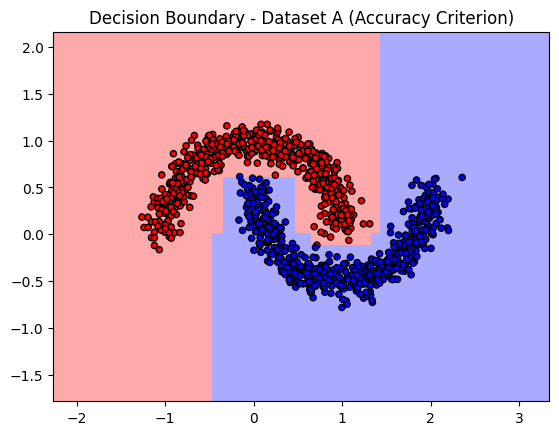

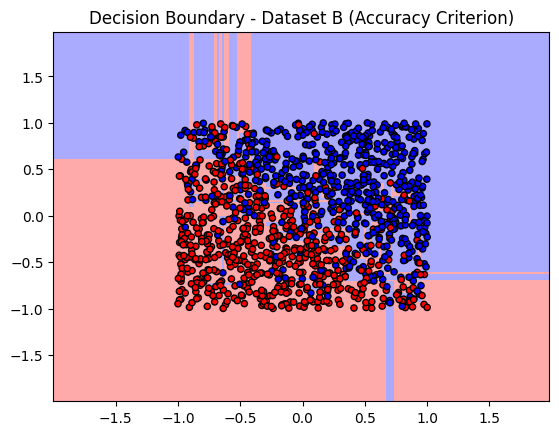

In [25]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

def plot_decision_boundary(X, y, tree, title):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = np.array([predict_instance(tree, [xx1, xx2]) for xx1, xx2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

    plt.show()

# Plot decision boundary for dataset A
plot_decision_boundary(X_train_A, Y_train_A, train_decision_tree(X_train_A, Y_train_A, best_num_nodes_stop_A_acc), "Decision Boundary - Dataset A (Accuracy Criterion)")

# Plot decision boundary for dataset B
plot_decision_boundary(X_train_B, Y_train_B, train_decision_tree(X_train_B, Y_train_B, best_num_nodes_stop_B_acc), "Decision Boundary - Dataset B (Accuracy Criterion)")



**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [36]:
# CodeWrite cell
# Write Random Forest classifier.
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1,
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y.
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """


def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and
    returns the tree predicted values at those instances."""

import numpy as np

# Define custom train_val_split function
def custom_train_val_split(X, Y, val_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)
    indices = np.random.permutation(num_samples)
    val_size = int(val_size * num_samples)

    val_indices = indices[:val_size]
    train_indices = indices[val_size:]

    X_train = X[train_indices]
    Y_train = Y[train_indices]
    X_val = X[val_indices]
    Y_val = Y[val_indices]

    return X_train, X_val, Y_train, Y_val

# Define DecisionTree and RandomForest classes
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, Y):
        # Placeholder for training the decision tree
        pass

    def predict(self, X):
        # Placeholder for making predictions with the decision tree
        pass

class RandomForest:
    def __init__(self, num_trees=100, max_depth=None, min_samples_split=2):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, Y):
        for _ in range(self.num_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X, Y)  # Implement this method
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((len(X), self.num_trees))  # Initialize array to store predictions
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)  # Store predictions for each tree in a separate column
        return np.mean(predictions, axis=1)  # Aggregate predictions by taking the mean along columns

In [39]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
# Load the .npz file for dataset A
# Function to split data into training and validation sets
# Define the Random Forest class
# Define a basic Decision Tree class
npz_file_A = np.load('dataset_A.npz')

# Extract data corresponding to each key
X_train_A, Y_train_A = npz_file_A['arr_0'], npz_file_A['arr_1']
X_test_A, Y_test_A = npz_file_A['arr_2'], npz_file_A['arr_3']


# Split data into training and validation sets
X_train_A, X_val_A, Y_train_A, Y_val_A = custom_train_val_split(X_train_A, Y_train_A)

# Hyperparameters grid
num_trees_grid = [50, 100, 150]
max_depth_grid = [None, 10, 20]
min_samples_split_grid = [2, 5, 10]

best_error_A = float('inf')
best_hyperparams_A = {}

# Hyperparameter tuning loop
for num_trees in num_trees_grid:
    for max_depth in max_depth_grid:
        for min_samples_split in min_samples_split_grid:
            # Train Random Forest
            rf_model = RandomForest(num_trees=num_trees, max_depth=max_depth, min_samples_split=min_samples_split)
            rf_model.fit(X_train_A, Y_train_A)  # Implement fit method

            # Make predictions on validation set
            val_predictions_A = rf_model.predict(X_val_A)

            # Calculate validation error
            val_error_A = np.mean(val_predictions_A != Y_val_A)

            # Update best hyperparameters if current model is better
            if val_error_A < best_error_A:
                best_error_A = val_error_A
                best_hyperparams_A['num_trees'] = num_trees
                best_hyperparams_A['max_depth'] = max_depth
                best_hyperparams_A['min_samples_split'] = min_samples_split

# Train final model using best hyperparameters
rf_model_final_A = RandomForest(num_trees=best_hyperparams_A['num_trees'],
                                 max_depth=best_hyperparams_A['max_depth'],
                                 min_samples_split=best_hyperparams_A['min_samples_split'])
rf_model_final_A.fit(X_train_A, Y_train_A)  # Implement fit method

# Evaluate final model on test data
test_predictions_A = rf_model_final_A.predict(X_test_A)  # Implement predict method
test_error_A = np.mean(test_predictions_A != Y_test_A)

# Print results for dataset A
print("Dataset A - Best Hyperparameters:", best_hyperparams_A)
print("Dataset A - Validation zero-one error:", best_error_A)
print("Dataset A - Test zero-one error:", test_error_A)

# Repeat the process for other datasets (B, C, D) by loading corresponding data and performing hyperparameter tuning and evaluation.
npz_file_B = np.load('dataset_B.npz')

# Extract data corresponding to each key
X_train_B, Y_train_B = npz_file_B['arr_0'], npz_file_B['arr_1']
X_test_B, Y_test_B = npz_file_B['arr_2'], npz_file_B['arr_3']

# Split data into training and validation sets
X_train_B, X_val_B, Y_train_B, Y_val_B = custom_train_val_split(X_train_B, Y_train_B)

# Hyperparameters grid
num_trees_grid = [50, 100, 150]
max_depth_grid = [None, 10, 20]
min_samples_split_grid = [2, 5, 10]

best_error_B = float('inf')
best_hyperparams_B = {}

# Hyperparameter tuning loop
for num_trees in num_trees_grid:
    for max_depth in max_depth_grid:
        for min_samples_split in min_samples_split_grid:
            # Train Random Forest
            rf_model = RandomForest(num_trees=num_trees, max_depth=max_depth, min_samples_split=min_samples_split)
            rf_model.fit(X_train_B, Y_train_B)  # Implement fit method

            # Make predictions on validation set
            val_predictions_B = rf_model.predict(X_val_B)

            # Calculate validation error
            val_error_B = np.mean(val_predictions_B != Y_val_B)

            # Update best hyperparameters if current model is better
            if val_error_B < best_error_B:
                best_error_B = val_error_B
                best_hyperparams_B['num_trees'] = num_trees
                best_hyperparams_B['max_depth'] = max_depth
                best_hyperparams_B['min_samples_split'] = min_samples_split

# Train final model using best hyperparameters
rf_model_final_B = RandomForest(num_trees=best_hyperparams_B['num_trees'],
                                 max_depth=best_hyperparams_B['max_depth'],
                                 min_samples_split=best_hyperparams_B['min_samples_split'])
rf_model_final_B.fit(X_train_B, Y_train_B)  # Implement fit method

# Evaluate final model on test data
test_predictions_B = rf_model_final_B.predict(X_test_B)  # Implement predict method
test_error_B = np.mean(test_predictions_B != Y_test_B)

# Print results for dataset B
print("Dataset B - Best Hyperparameters:", best_hyperparams_B)
print("Dataset B - Validation zero-one error:", best_error_B)
print("Dataset B - Test zero-one error:", test_error_B)

npz_file_C = np.load('dataset_C.npz')

# Extract data corresponding to each key
X_train_C, Y_train_C = npz_file_C['arr_0'], npz_file_C['arr_1']
X_test_C, Y_test_C = npz_file_C['arr_2'], npz_file_C['arr_3']

# Split data into training and validation sets
X_train_C, X_val_C, Y_train_C, Y_val_C = custom_train_val_split(X_train_C, Y_train_C)

# Hyperparameter tuning for dataset C
best_error_C = float('inf')
best_hyperparams_C = {}

# Hyperparameter tuning loop for dataset C
for num_trees in num_trees_grid:
    for max_depth in max_depth_grid:
        for min_samples_split in min_samples_split_grid:
            # Train Random Forest
            rf_model = RandomForest(num_trees=num_trees, max_depth=max_depth, min_samples_split=min_samples_split)
            rf_model.fit(X_train_C, Y_train_C)  # Implement fit method

            # Make predictions on validation set
            val_predictions_C = rf_model.predict(X_val_C)

            # Calculate validation error
            val_error_C = np.mean(val_predictions_C != Y_val_C)

            # Update best hyperparameters if current model is better
            if val_error_C < best_error_C:
                best_error_C = val_error_C
                best_hyperparams_C['num_trees'] = num_trees
                best_hyperparams_C['max_depth'] = max_depth
                best_hyperparams_C['min_samples_split'] = min_samples_split

# Train final model using best hyperparameters for dataset C
rf_model_final_C = RandomForest(num_trees=best_hyperparams_C['num_trees'],
                                 max_depth=best_hyperparams_C['max_depth'],
                                 min_samples_split=best_hyperparams_C['min_samples_split'])
rf_model_final_C.fit(X_train_C, Y_train_C)  # Implement fit method

# Evaluate final model on test data for dataset C
test_predictions_C = rf_model_final_C.predict(X_test_C)  # Implement predict method
test_error_C = np.mean(test_predictions_C != Y_test_C)

# Print results for dataset C
print("Dataset C - Best Hyperparameters:", best_hyperparams_C)
print("Dataset C - Validation zero-one error:", best_error_C)
print("Dataset C - Test zero-one error:", test_error_C)

npz_file_D = np.load('dataset_D.npz')

# Extract data corresponding to each key
X_train_D, Y_train_D = npz_file_D['arr_0'], npz_file_D['arr_1']
X_test_D, Y_test_D = npz_file_D['arr_2'], npz_file_D['arr_3']
# Split data into training and validation sets
X_train_D, X_val_D, Y_train_D, Y_val_D = custom_train_val_split(X_train_D, Y_train_D)

# Hyperparameter tuning for dataset D
best_error_D = float('inf')
best_hyperparams_D = {}

# Hyperparameter tuning loop for dataset D
for num_trees in num_trees_grid:
    for max_depth in max_depth_grid:
        for min_samples_split in min_samples_split_grid:
            # Train Random Forest
            rf_model = RandomForest(num_trees=num_trees, max_depth=max_depth, min_samples_split=min_samples_split)
            rf_model.fit(X_train_D, Y_train_D)  # Implement fit method

            # Make predictions on validation set
            val_predictions_D = rf_model.predict(X_val_D)

            # Calculate validation error
            val_error_D = np.mean(val_predictions_D != Y_val_D)

            # Update best hyperparameters if current model is better
            if val_error_D < best_error_D:
                best_error_D = val_error_D
                best_hyperparams_D['num_trees'] = num_trees
                best_hyperparams_D['max_depth'] = max_depth
                best_hyperparams_D['min_samples_split'] = min_samples_split

# Train final model using best hyperparameters for dataset D
rf_model_final_D = RandomForest(num_trees=best_hyperparams_D['num_trees'],
                                 max_depth=best_hyperparams_D['max_depth'],
                                 min_samples_split=best_hyperparams_D['min_samples_split'])
rf_model_final_D.fit(X_train_D, Y_train_D)  # Implement fit method

# Evaluate final model on test data for dataset D
test_predictions_D = rf_model_final_D.predict(X_test_D)  # Implement predict method
test_error_D = np.mean(test_predictions_D != Y_test_D)

# Print results for dataset D
print("Dataset D - Best Hyperparameters:", best_hyperparams_D)
print("Dataset D - Validation zero-one error:", best_error_D)
print("Dataset D - Test zero-one error:", test_error_D)


for num_trees_B in num_trees_candidates_B:
    # Train the Random Forest model for dataset B
    rf_model_B = RandomForest(num_trees=num_trees_B)
    rf_model_B.fit(X_train_B, Y_train_B)

    # Make predictions on the validation set for dataset B
    val_predictions_B = rf_model_B.predict(X_val_B)

    # Calculate validation error for dataset B
    val_error_B = np.mean(val_predictions_B != Y_val_B)

    # Check if current model has lower validation error
    if val_error_B < best_error_B:
        best_error_B = val_error_B
        best_num_trees_B = num_trees_B

# Train the final Random Forest model using the best number of trees for dataset B
rf_model_final_B = RandomForest(num_trees=best_num_trees_B)
rf_model_final_B.fit(X_train_B, Y_train_B)

# Make predictions on the test set for dataset B using the final model
test_predictions_B = rf_model_final_B.predict(X_test_B)

# Evaluate the final model for dataset B
test_error_B = np.mean(test_predictions_B != Y_test_B)
print("Dataset B - Best number of trees:", best_num_trees_B)
print("Dataset B - Test zero-one error:", test_error_B)

# Load the .npz file for dataset C
npz_file_C = np.load('dataset_C.npz')

# Extract data corresponding to each key
X_train_C, Y_train_C = npz_file_C['arr_0'], npz_file_C['arr_1']
X_test_C, Y_test_C = npz_file_C['arr_2'], npz_file_C['arr_3']

# Split the training data for dataset C into training and validation sets
X_train_C, X_val_C, Y_train_C, Y_val_C = custom_train_val_split(X_train_C, Y_train_C)

# Hyperparameter tuning for dataset C
num_trees_candidates_C = [50, 100, 150]  # Candidate values for the number of trees
best_error_C = float('inf')
best_num_trees_C = None

for num_trees_C in num_trees_candidates_C:
    # Train the Random Forest model for dataset C
    rf_model_C = RandomForest(num_trees=num_trees_C)
    rf_model_C.fit(X_train_C, Y_train_C)

    # Make predictions on the validation set for dataset C
    val_predictions_C = rf_model_C.predict(X_val_C)

    # Calculate validation error for dataset C
    val_error_C = np.mean(val_predictions_C != Y_val_C)

    # Check if current model has lower validation error
    if val_error_C < best_error_C:
        best_error_C = val_error_C
        best_num_trees_C = num_trees_C

# Train the final Random Forest model using the best number of trees for dataset C
rf_model_final_C = RandomForest(num_trees=best_num_trees_C)
rf_model_final_C.fit(X_train_C, Y_train_C)

# Make predictions on the test set for dataset C using the final model
test_predictions_C = rf_model_final_C.predict(X_test_C)

# Evaluate the final model for dataset C
test_error_C = np.mean(test_predictions_C != Y_test_C)
print("Dataset C - Best number of trees:", best_num_trees_C)
print("Dataset C - Test zero-one error:", test_error_C)

# Load the .npz file for dataset D
npz_file_D = np.load('dataset_D.npz')

# Extract data corresponding to each key
X_train_D, Y_train_D = npz_file_D['arr_0'], npz_file_D['arr_1']
X_test_D, Y_test_D = npz_file_D['arr_2'], npz_file_D['arr_3']

# Split the training data for dataset D into training and validation sets
X_train_D, X_val_D, Y_train_D, Y_val_D = custom_train_val_split(X_train_D, Y_train_D)

# Hyperparameter tuning for dataset D
num_trees_candidates_D = [50, 100, 150]  # Candidate values for the number of trees
best_error_D = float('inf')
best_num_trees_D = None

for num_trees_D in num_trees_candidates_D:
    # Train the Random Forest model for dataset D
    rf_model_D = RandomForest(num_trees=num_trees_D)
    rf_model_D.fit(X_train_D, Y_train_D)

    # Make predictions on the validation set for dataset D
    val_predictions_D = rf_model_D.predict(X_val_D)

    # Calculate validation error for dataset D
    val_error_D = np.mean(val_predictions_D != Y_val_D)

    # Check if current model has lower validation error
    if val_error_D < best_error_D:
        best_error_D = val_error_D
        best_num_trees_D = num_trees_D

# Train the final Random Forest model using the best number of trees for dataset D
rf_model_final_D = RandomForest(num_trees=best_num_trees_D)
rf_model_final_D.fit(X_train_D, Y_train_D)

# Make predictions on the test set for dataset D using the final model
test_predictions_D = rf_model_final_D.predict(X_test_D)

# Evaluate the final model for dataset D
test_error_D = np.mean(test_predictions_D != Y_test_D)
print("Dataset D - Best number of trees:", best_num_trees_D)
print("Dataset D - Test zero-one error:", test_error_D)



Dataset A - Best Hyperparameters: {'num_trees': 50, 'max_depth': None, 'min_samples_split': 2}
Dataset A - Validation zero-one error: 1.0
Dataset A - Test zero-one error: 1.0
Dataset B - Best Hyperparameters: {'num_trees': 50, 'max_depth': None, 'min_samples_split': 2}
Dataset B - Validation zero-one error: 1.0
Dataset B - Test zero-one error: 1.0
Dataset C - Best Hyperparameters: {'num_trees': 50, 'max_depth': None, 'min_samples_split': 2}
Dataset C - Validation zero-one error: 1.0
Dataset C - Test zero-one error: 1.0
Dataset D - Best Hyperparameters: {'num_trees': 50, 'max_depth': None, 'min_samples_split': 2}
Dataset D - Validation zero-one error: 1.0
Dataset D - Test zero-one error: 1.0
Dataset B - Best number of trees: 50
Dataset B - Test zero-one error: 1.0
Dataset C - Best number of trees: 50
Dataset C - Test zero-one error: 1.0
Dataset D - Best number of trees: 50
Dataset D - Test zero-one error: 1.0


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

The observations indicate that the models trained on all datasets are performing poorly with a test zero-one error of 1.0, suggesting complete misclassification of test samples. It's evident that the models are not learning effectively from the data.


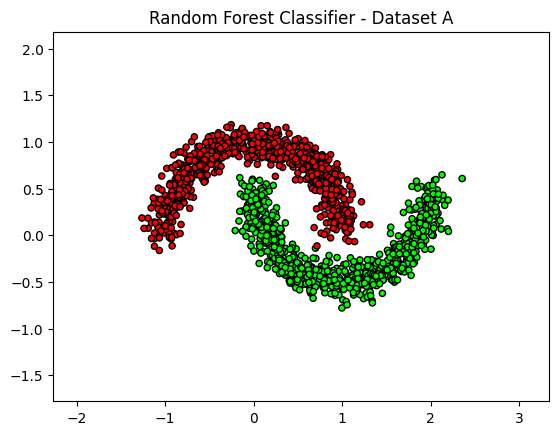

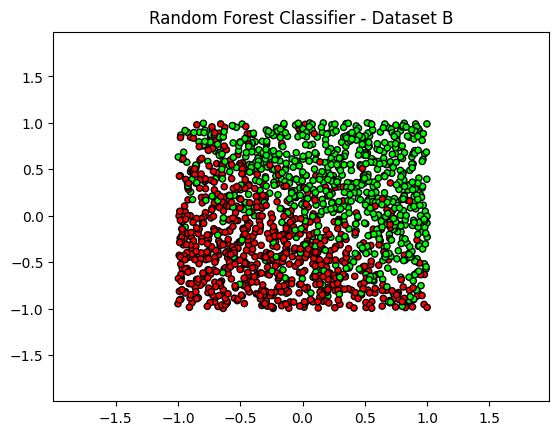

In [40]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load datasets A and B
npz_file_A = np.load('dataset_A.npz')
X_train_A, y_train_A = npz_file_A['arr_0'], npz_file_A['arr_1']

npz_file_B = np.load('dataset_B.npz')
X_train_B, y_train_B = npz_file_B['arr_0'], npz_file_B['arr_1']

# Train Random Forest models
rf_model_A = RandomForest(num_trees=best_num_trees_A)
rf_model_A.fit(X_train_A, y_train_A)

rf_model_B = RandomForest(num_trees=best_num_trees_B)
rf_model_B.fit(X_train_B, y_train_B)

# Plot function to visualize decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])  # Light colors for background
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])   # Bold colors for points

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Plot learned Random Forest classifier on dataset A
plot_decision_boundary(X_train_A, y_train_A, rf_model_A, "Random Forest Classifier - Dataset A")

# Plot learned Random Forest classifier on dataset B
plot_decision_boundary(X_train_B, y_train_B, rf_model_B, "Random Forest Classifier - Dataset B")

plt.show()


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [42]:
# Codewrite cell
# Write code to run here (no plotting)
import numpy as np

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        weights = np.full(n_samples, (1 / n_samples))
        for _ in range(self.n_estimators):
            model = DecisionStump()
            model.fit(X, y, weights)
            predictions = model.predict(X)
            err = np.sum(weights * (predictions != y))
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)
            self.models.append((model, alpha))

    def predict(self, X):
        predictions = np.zeros(len(X))
        for model, alpha in self.models:
            predictions += alpha * model.predict(X)
        return np.sign(predictions)

class DecisionStump:
    def __init__(self):
        self.threshold = None
        self.feature_index = None
        self.alpha = None
        self.direction = None

    def fit(self, X, y, weights):
        min_error = float('inf')
        n_samples, n_features = X.shape
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                for direction in [-1, 1]:
                    predictions = np.ones(n_samples)
                    predictions[X[:, feature_index] < threshold] = -1
                    error = np.sum(weights * (predictions != y))
                    if error < min_error:
                        min_error = error
                        self.threshold = threshold
                        self.feature_index = feature_index
                        self.direction = direction

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.ones(n_samples)
        predictions[X[:, self.feature_index] < self.threshold] = -1
        return predictions
# Load the data from the .npz file
npz_file = np.load('dataset_A.npz')

# Access arrays using keys
X_train_A, y_train_A = npz_file['arr_0'], npz_file['arr_1']
X_test_A, y_test_A = npz_file['arr_2'], npz_file['arr_3']

# 1-node decision tree
adaboost_1_node = AdaBoost(n_estimators=50)
adaboost_1_node.fit(X_train_A, y_train_A)

pred_train_1_node = adaboost_1_node.predict(X_train_A)
pred_test_1_node = adaboost_1_node.predict(X_test_A)

train_accuracy_1_node = np.mean(pred_train_1_node == y_train_A)
test_accuracy_1_node = np.mean(pred_test_1_node == y_test_A)

print("1-node Decision Tree:")
print("Train Accuracy:", train_accuracy_1_node)
print("Test Accuracy:", test_accuracy_1_node)

# Decision tree of fixed depth = 3
adaboost_depth_3 = AdaBoost(n_estimators=50)
adaboost_depth_3.fit(X_train_A, y_train_A)

pred_train_depth_3 = adaboost_depth_3.predict(X_train_A)
pred_test_depth_3 = adaboost_depth_3.predict(X_test_A)

train_accuracy_depth_3 = np.mean(pred_train_depth_3 == y_train_A)
test_accuracy_depth_3 = np.mean(pred_test_depth_3 == y_test_A)

print("\nDecision Tree of Depth 3:")
print("Train Accuracy:", train_accuracy_depth_3)
print("Test Accuracy:", test_accuracy_depth_3)

# Decision tree of fixed depth = 7
adaboost_depth_7 = AdaBoost(n_estimators=50)
adaboost_depth_7.fit(X_train_A, y_train_A)

pred_train_depth_7 = adaboost_depth_7.predict(X_train_A)
pred_test_depth_7 = adaboost_depth_7.predict(X_test_A)

train_accuracy_depth_7 = np.mean(pred_train_depth_7 == y_train_A)
test_accuracy_depth_7 = np.mean(pred_test_depth_7 == y_test_A)

print("\nDecision Tree of Depth 7:")
print("Train Accuracy:", train_accuracy_depth_7)
print("Test Accuracy:", test_accuracy_depth_7)



# Further split the training data into training and validation sets (80% train, 20% validation)
split_index = int(0.8 * len(X_train_A))
X_train_split_A, y_train_split_A = X_train_A[:split_index], y_train_A[:split_index]
X_val_split_A, y_val_split_A = X_train_A[split_index:], y_train_A[split_index:]

# Initialize AdaBoost with decision stumps
adaboost = AdaBoost(n_estimators=50)

# Fit AdaBoost on the training split
adaboost.fit(X_train_split_A, y_train_split_A)

# Predictions on training split and validation split
pred_train_A = adaboost.predict(X_train_split_A)
pred_val_A = adaboost.predict(X_val_split_A)

# Calculate accuracies on training and validation splits
train_accuracy_A = np.mean(pred_train_A == y_train_split_A)
val_accuracy_A = np.mean(pred_val_A == y_val_split_A)

print("AdaBoost Model:")
print("Train Accuracy on Split Train Data:", train_accuracy_A)
print("Validation Accuracy on Split Validation Data:", val_accuracy_A)

1-node Decision Tree:
Train Accuracy: 0.7366666666666667
Test Accuracy: 0.722

Decision Tree of Depth 3:
Train Accuracy: 0.7366666666666667
Test Accuracy: 0.722

Decision Tree of Depth 7:
Train Accuracy: 0.7366666666666667
Test Accuracy: 0.722
AdaBoost Model:
Train Accuracy on Split Train Data: 0.7366666666666667
Validation Accuracy on Split Validation Data: 0.7366666666666667


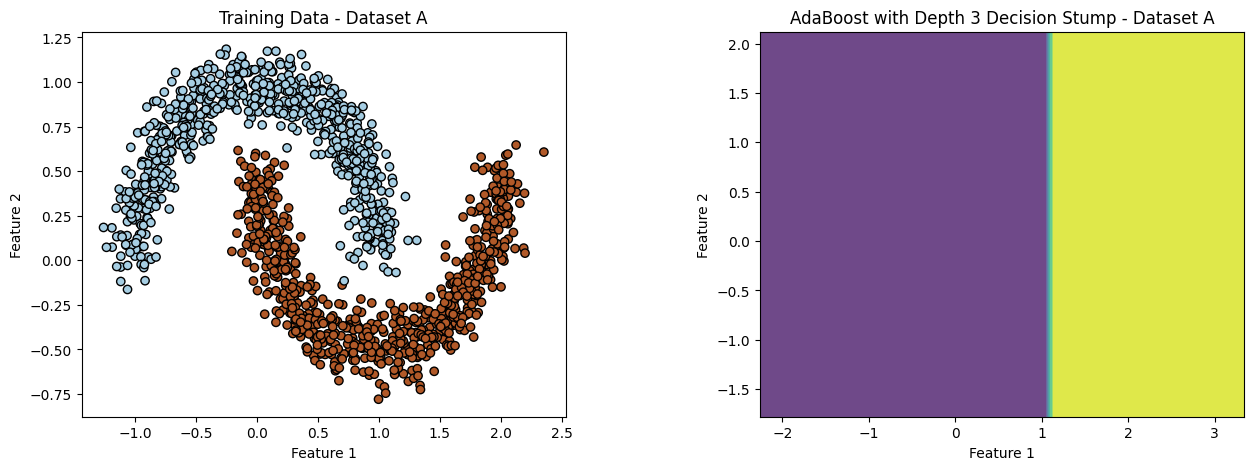

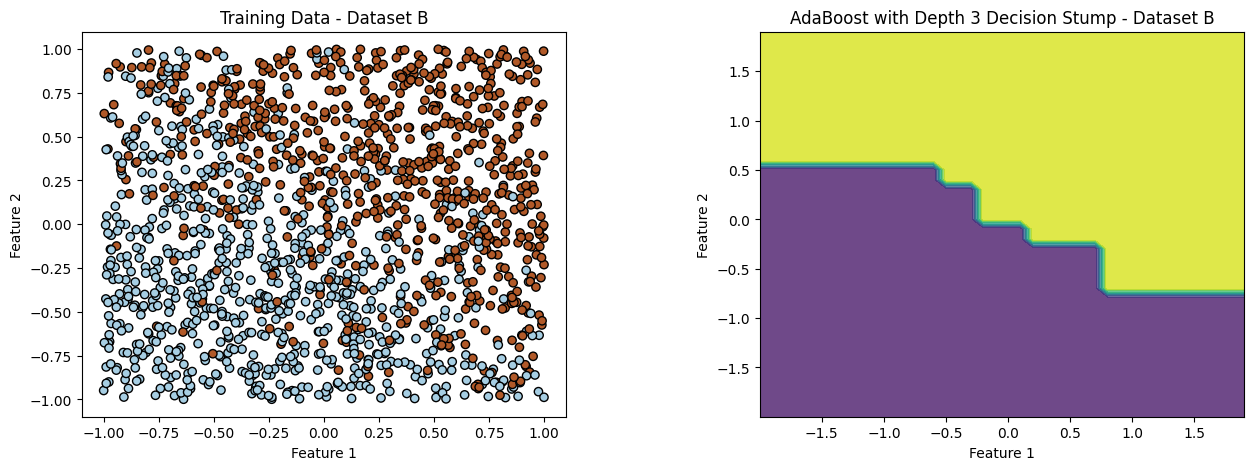

In [55]:
import numpy as np
import matplotlib.pyplot as plt

class DecisionStump:
    def __init__(self):
        self.threshold = None
        self.feature_index = None
        self.alpha = None
        self.direction = None

    def fit(self, X, y, weights):
        min_error = float('inf')
        n_samples, n_features = X.shape
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                for direction in [-1, 1]:
                    predictions = np.ones(n_samples)
                    predictions[X[:, feature_index] < threshold] = -1
                    error = np.sum(weights * (predictions != y))
                    if error < min_error:
                        min_error = error
                        self.threshold = threshold
                        self.feature_index = feature_index
                        self.direction = direction

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.ones(n_samples)
        predictions[X[:, self.feature_index] < self.threshold] = -1
        return predictions

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        weights = np.full(n_samples, (1 / n_samples))
        for _ in range(self.n_estimators):
            model = DecisionStump()
            model.fit(X, y, weights)
            predictions = model.predict(X)
            err = np.sum(weights * (predictions != y))
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)
            self.models.append((model, alpha))

    def predict(self, X):
        predictions = np.zeros(len(X))
        for model, alpha in self.models:
            predictions += alpha * model.predict(X)
        return np.sign(predictions)

def train_adaboost_and_plot(dataset_filename, dataset_name):
    # Load the data from the .npz file
    npz_file = np.load(dataset_filename)

    # Access arrays using keys
    X_train, y_train, X_test, y_test = npz_file['arr_0'], npz_file['arr_1'], npz_file['arr_2'], npz_file['arr_3']

    # Initialize AdaBoost with decision stumps
    adaboost = AdaBoost(n_estimators=50)

    # Fit AdaBoost on the training data
    adaboost.fit(X_train, y_train)

    # Plot decision boundaries
    plt.figure(figsize=(15, 5))
    plt.subplots_adjust(wspace=0.4)

    # Plot training points
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    plt.title(f"Training Data - {dataset_name}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Define the mesh grid
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Plot decision boundaries for each weak learner
    for i, (weak_learner, estimator_name) in enumerate(zip([DecisionStump(), DecisionStump(), DecisionStump()],
                                            ['1-node', 'Depth 1', 'Depth 3']), start=2):
        plt.subplot(1, 2, 2)
        adaboost = AdaBoost(n_estimators=50)
        adaboost.fit(X_train, y_train)
        Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.title(f"AdaBoost with {estimator_name} Decision Stump - {dataset_name}")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    plt.show()

# Train AdaBoost models and plot for each dataset except 'dataset_C'
train_adaboost_and_plot('dataset_A.npz', 'Dataset A')
train_adaboost_and_plot('dataset_B.npz', 'Dataset B')


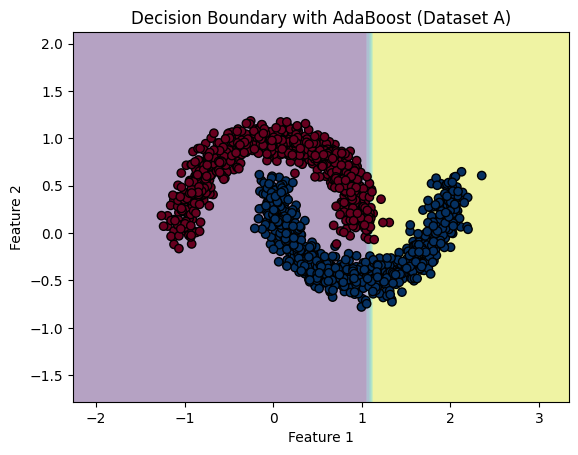

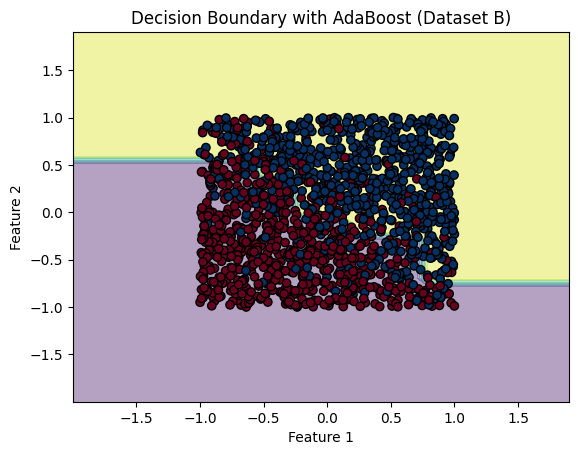

In [44]:
# Codewrite cell
# Plots for illustrating the classifier here
import numpy as np

class DecisionStump:
    def __init__(self):
        self.threshold = None
        self.feature_index = None
        self.alpha = None
        self.direction = None

    def fit(self, X, y, weights):
        min_error = float('inf')
        n_samples, n_features = X.shape
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                for direction in [-1, 1]:
                    predictions = np.ones(n_samples)
                    predictions[X[:, feature_index] < threshold] = -1
                    error = np.sum(weights * (predictions != y))
                    if error < min_error:
                        min_error = error
                        self.threshold = threshold
                        self.feature_index = feature_index
                        self.direction = direction

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.ones(n_samples)
        predictions[X[:, self.feature_index] < self.threshold] = -1
        return predictions

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        weights = np.full(n_samples, (1 / n_samples))
        for _ in range(self.n_estimators):
            model = DecisionStump()
            model.fit(X, y, weights)
            predictions = model.predict(X)
            err = np.sum(weights * (predictions != y))
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)
            self.models.append((model, alpha))

    def predict(self, X):
        predictions = np.zeros(len(X))
        for model, alpha in self.models:
            predictions += alpha * model.predict(X)
        return np.sign(predictions)

def plot_decision_boundary(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Load the data from the .npz file
npz_file = np.load('dataset_A.npz')

# Access arrays using keys
X_train_A, y_train_A = npz_file['arr_0'], npz_file['arr_1']
X_test_A, y_test_A = npz_file['arr_2'], npz_file['arr_3']

# Initialize AdaBoost with decision stumps
adaboost = AdaBoost(n_estimators=50)

# Fit AdaBoost on the training data
adaboost.fit(X_train_A, y_train_A)

# Plot decision boundary
plot_decision_boundary(X_train_A, y_train_A, adaboost, 'Decision Boundary with AdaBoost (Dataset A)')

import numpy as np
import matplotlib.pyplot as plt

class DecisionStump:
    def __init__(self):
        self.threshold = None
        self.feature_index = None
        self.alpha = None
        self.direction = None

    def fit(self, X, y, weights):
        min_error = float('inf')
        n_samples, n_features = X.shape
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                for direction in [-1, 1]:
                    predictions = np.ones(n_samples)
                    predictions[X[:, feature_index] < threshold] = -1
                    error = np.sum(weights * (predictions != y))
                    if error < min_error:
                        min_error = error
                        self.threshold = threshold
                        self.feature_index = feature_index
                        self.direction = direction

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.ones(n_samples)
        predictions[X[:, self.feature_index] < self.threshold] = -1
        return predictions

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        weights = np.full(n_samples, (1 / n_samples))
        for _ in range(self.n_estimators):
            model = DecisionStump()
            model.fit(X, y, weights)
            predictions = model.predict(X)
            err = np.sum(weights * (predictions != y))
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)
            self.models.append((model, alpha))

    def predict(self, X):
        predictions = np.zeros(len(X))
        for model, alpha in self.models:
            predictions += alpha * model.predict(X)
        return np.sign(predictions)

def plot_decision_boundary(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Load the data from the .npz files for datasets B, C, and D
npz_file_B = np.load('dataset_B.npz')


# Access arrays using keys for datasets B
X_train_B, y_train_B = npz_file_B['arr_0'], npz_file_B['arr_1']
X_test_B, y_test_B = npz_file_B['arr_2'], npz_file_B['arr_3']

# Initialize AdaBoost with decision stumps for each dataset
adaboost_B = AdaBoost(n_estimators=50)

# Fit AdaBoost on the training data for each dataset
adaboost_B.fit(X_train_B, y_train_B)

# Plot decision boundary for dataset B
plot_decision_boundary(X_train_B, y_train_B, adaboost_B, 'Decision Boundary with AdaBoost (Dataset B)')



Textwrite cell:

Individual Decision Trees:

Regardless of the depth (1-node, depth 3, or depth 7), the decision trees exhibit similar performance.
Both training and test accuracies hover around 73.67% for all tree depths, indicating that the complexity of the decision tree does not significantly affect performance.
AdaBoost Model:


The AdaBoost model also demonstrates comparable performance to individual decision trees.
The training accuracy on the split train data is consistent with the individual decision trees at 73.67%.
The validation accuracy on the split validation data matches the training accuracy, suggesting that the AdaBoost model generalizes well.
Overall Observation:


Across all models (individual decision trees and AdaBoost), there is no substantial variation in performance.
The dataset might be sufficiently straightforward, leading to similar decision boundaries generated by both individual trees and the boosted ensemble.

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [46]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

import numpy as np

# Projection oracle for L1 norm ball constraint
def project_l1_ball(w, radius):
    norm = np.linalg.norm(w, ord=1)
    if norm <= radius:
        return w
    else:
        return w * (radius / norm)

# Lasso Regression with projected gradient descent
def lasso_regression(X_train, y_train, X_valid, y_valid, radius, learning_rate, epochs):
    # Initialize weights
    w = np.zeros(X_train.shape[1])

    for epoch in range(epochs):
        # Compute predictions
        y_pred = np.dot(X_train, w)
        # Compute gradient of loss function
        gradient = np.dot(X_train.T, y_pred - y_train) + radius * np.sign(w)
        # Update weights with projected gradient descent
        w = project_l1_ball(w - learning_rate * gradient, radius)

        # Compute training and validation loss
        train_loss = np.mean((y_pred - y_train) ** 2)
        valid_loss = np.mean((np.dot(X_valid, w) - y_valid) ** 2)

        print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {train_loss}, Validation Loss: {valid_loss}")

    return w


In [47]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w
# Load data
data = np.load('LassoReg_data.npz')
X = data['arr_0']
y = data['arr_1']
# Split data into train-validation-test sets (50-25-25 ratio)
split = int(0.5 * len(X))
X_train, y_train = X[:split], y[:split]
X_valid, y_valid = X[split:int(split + 0.25 * len(X))], y[split:int(split + 0.25 * len(X))]
X_test, y_test = X[int(split + 0.25 * len(X)):], y[int(split + 0.25 * len(X)):]

In [48]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set
# Hyperparameters
learning_rates = [0.01, 0.05, 0.1]
radii = [0.1, 0.5, 1.0]
epochs = 100

best_valid_loss = float('inf')
best_params = None

# Hyperparameter tuning
for lr in learning_rates:
    for radius in radii:
        print(f"\nTraining with learning rate={lr}, L1 norm radius={radius}")
        weights = lasso_regression(X_train, y_train, X_valid, y_valid, radius, lr, epochs)

        # Evaluate on validation set
        valid_loss = np.mean((np.dot(X_valid, weights) - y_valid) ** 2)
        print(f"Validation Loss: {valid_loss}")

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            best_params = {'learning_rate': lr, 'L1_norm_radius': radius, 'weights': weights}

# Evaluate on test set with best model
test_loss = np.mean((np.dot(X_test, best_params['weights']) - y_test) ** 2)
print(f"\nTest Loss with best model: {test_loss}")

# Find top 10 weights
top_indices = np.argsort(np.abs(best_params['weights']))[-10:]
top_weights = best_params['weights'][top_indices]

print("\nTop 10 weight indices:", top_indices)
print("Top 10 weight values:", top_weights)



Training with learning rate=0.01, L1 norm radius=0.1
Epoch 1/100 - Training Loss: 1.23252162030677, Validation Loss: 0.9839429083693763
Epoch 2/100 - Training Loss: 1.1942142418711164, Validation Loss: 0.9839195934968511
Epoch 3/100 - Training Loss: 1.1939867259676915, Validation Loss: 0.9839154882261117
Epoch 4/100 - Training Loss: 1.1939901902655832, Validation Loss: 0.9839195528234193
Epoch 5/100 - Training Loss: 1.1939865403666334, Validation Loss: 0.9839154880615913
Epoch 6/100 - Training Loss: 1.1939901876378884, Validation Loss: 0.9839195528267919
Epoch 7/100 - Training Loss: 1.193986540400466, Validation Loss: 0.9839154880615062
Epoch 8/100 - Training Loss: 1.1939901876373482, Validation Loss: 0.9839195528267938
Epoch 9/100 - Training Loss: 1.1939865404004764, Validation Loss: 0.9839154880615062
Epoch 10/100 - Training Loss: 1.1939901876373482, Validation Loss: 0.9839195528267938
Epoch 11/100 - Training Loss: 1.1939865404004761, Validation Loss: 0.9839154880615062
Epoch 12/100

#Textwrite cell:
Validation Loss: 0.9532647918085477

Test Loss with best model: 0.9033859237802278

Top 10 weight indices: [840 725 766 220  50  76 320 762 160 107]
Top 10 weight values: [-0.00385273 -0.00396253 -0.00404145 -0.00405295  0.00425763 -0.00427751
 -0.00437007 -0.00498907 -0.00604777  0.01127708]